# Jaklyn Soler

# Module 4 Project

# Strategic Summary

### Objective

It is April 2018 and I have been tasked with recommending 5 top zip codes to a real estate investment company. My responsibilities include analyzing risk, profit, and exploring other concepts independently. 

### Strategic Data Selection

In order to select the area, I defined the best strategy as long term property rentals. I defined the best area as the northeast due to the low rental vacancy rate. One common strategy real estate investors employ is seeking out probate properties and due to the high amount of baby boomers in New York, it is likely that there will be a high number of properties in the probate system over the next 20 years. Therefore, New York was selected as the best state for investments. An assumption that the real estate investment company has a large amount of capital was assumed in order to select the parameters of price for the properties. Properties between 500000 dollars and 700000 dollars were selected as they will have a high amount of value which means high rental prices and simletaneously allow the investor to have multiple properties so that having a problem with one tenant wont put a halt on cash flow. 

### Return on Investment 

After these decisions were made, I analysed percentage of roi on value of the home. Average monthly rental amount falls between .8% and 1.1% of the property value. By having a more competitive rental price, property owners can be more selective in their tenant evaluation since it will attract more interested renters. In light of this strategy, I selected the monthly rental amount of .9% meaning that in a 12 month period, the tenant would pay 10.8% of the property value. Not accounting for property maintenance and vacancy, every property would pay for its initial amount in 9 years and four months.

### Layout
PART ONE: Introduction & Zipcode Analysis
PART TWO: Zipcode Analysis
PART THREE: Zipcode Analysis
PART FOUR: Final Analysis & Conclusion

# Loading Zillow Data

### Relevant packages can be imported.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
import xlrd
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from pmdarima.arima import auto_arima
from pmdarima.arima import ADFTest
from sklearn.metrics import r2_score
from pmdarima.arima import ndiffs
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas.plotting import autocorrelation_plot, lag_plot
import warnings
warnings.filterwarnings('ignore')
import itertools
import statsmodels.api as sm
from matplotlib.pylab import rcParams
plt.style.use('ggplot')
from statsmodels.tsa.stattools import adfuller

### Truncating can be removed for better analysis. 

In [2]:
pd.set_option('display.max_columns', None) #prevents trailing elipses
pd.set_option('display.max_rows', None)

In [3]:
df = pd.read_csv('data/zillow_data.csv')
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,337600.0,338500.0,339500.0,340400.0,341300.0,342600.0,344400.0,345700.0,346700.0,347800.0,349000.0,350400.0,352000.0,353900.0,356200.0,358800.0,361800.0,365700.0,370200.0,374700.0,378900.0,383500.0,388300.0,393300.0,398500.0,403800.0,409100.0,414600.0,420100.0,426200.0,432600.0,438600.0,444200.0,450000.0,455900.0,462100.0,468500.0,475300.0,482500.0,490200.0,498200.0,507200.0,516800.0,526300.0,535300.0,544500.0,553500.0,562400.0,571200.0,579800.0,588100.0,596300.0,604200.0,612200.0,620200.0,627700.0,634500.0,641000.0,647000.0,652700.0,658100.0,663300.0,668400.0,673400.0,678300.0,683200.0,688300.0,693300.0,698000.0,702400.0,706400.0,710200.0,714000.0,717800.0,721700.0,725700.0,729900.0,733400.0,735600.0,737200.0,739000.0,740900.0,742700.0,744400.0,746000.0,747200.0,748000.0,749000.0,750200.0,752300.0,755300.0,759200.0,764000.0,769600.0,775600.0,781900.0,787900.0,793200.0,798200.0,803100.0,807900.0,812900.0,818100.0,823100.0,828300.0,834100.0,839800.0,845600.0,851800.0,858000.0,864400.0,870700.0,876200.0,880700.0,884400.0,887600.0,890500.0,893300.0,895500.0,897300.0,899000.0,900400.0,902000.0,904400.0,907100.0,909700.0,911900.0,913000.0,913000.0,912000.0,909300.0,905300.0,901400.0,897900.0,895400.0,893600.0,891100.0,887000.0,881700.0,875900.0,870300.0,865100.0,859000.0,851500.0,843800.0,836400.0,830700.0,827300.0,824800.0,821600.0,818300.0,814600.0,809800.0,803600.0,795500.0,786900.0,780700.0,776900.0,774700.0,774200.0,774400.0,774600.0,775600.0,777800.0,775200.0,767900.0,764700.0,766100.0,764100.0,759700.0,754900.0,746200.0,737300.0,730800.0,729300.0,730200.0,730700.0,730000.0,730100.0,730100.0,731200.0,733900.0,735500.0,735400.0,734400.0,737500.0,737700.0,733700.0,734000.0,740300.0,744600.0,750500.0,760400.0,771800.0,780600.0,

# Data Preprocessing

### Shape can be observed.

In [4]:
df.shape

(14723, 272)

### RegionID column can be removed with SizeRank.

In [5]:
df.drop(columns=['RegionID', 'SizeRank'], inplace=True)

### NaN values can be identified.

In [6]:
df.isna().sum()

RegionName       0
City             0
State            0
Metro         1043
CountyName       0
1996-04       1039
1996-05       1039
1996-06       1039
1996-07       1039
1996-08       1039
1996-09       1039
1996-10       1039
1996-11       1039
1996-12       1039
1997-01       1039
1997-02       1039
1997-03       1039
1997-04       1039
1997-05       1039
1997-06       1039
1997-07       1038
1997-08       1038
1997-09       1038
1997-10       1038
1997-11       1038
1997-12       1038
1998-01       1036
1998-02       1036
1998-03       1036
1998-04       1036
1998-05       1036
1998-06       1036
1998-07       1036
1998-08       1036
1998-09       1036
1998-10       1036
1998-11       1036
1998-12       1036
1999-01       1036
1999-02       1036
1999-03       1036
1999-04       1036
1999-05       1036
1999-06       1036
1999-07       1036
1999-08       1036
1999-09       1036
1999-10       1036
1999-11       1036
1999-12       1036
2000-01       1036
2000-02       1036
2000-03     

In [7]:
df[:][:].isna().sum().sum()

157934

### Metro column containing NaN values can be removed. 

In [8]:
df.drop(columns='Metro', inplace = True)

In [9]:
df.head(2)

,RegionName,City,State,CountyName,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,60657,Chicago,IL,Cook,334200.0,335400.0,336500.0,337600.0,338500.0,339500.0,340400.0,341300.0,342600.0,344400.0,345700.0,346700.0,347800.0,349000.0,350400.0,352000.0,353900.0,356200.0,358800.0,361800.0,365700.0,370200.0,374700.0,378900.0,383500.0,388300.0,393300.0,398500.0,403800.0,409100.0,414600.0,420100.0,426200.0,432600.0,438600.0,444200.0,450000.0,455900.0,462100.0,468500.0,475300.0,482500.0,490200.0,498200.0,507200.0,516800.0,526300.0,535300.0,544500.0,553500.0,562400.0,571200.0,579800.0,588100.0,596300.0,604200.0,612200.0,620200.0,627700.0,634500.0,641000.0,647000.0,652700.0,658100.0,663300.0,668400.0,673400.0,678300.0,683200.0,688300.0,693300.0,698000.0,702400.0,706400.0,710200.0,714000.0,717800.0,721700.0,725700.0,729900.0,733400.0,735600.0,737200.0,739000.0,740900.0,742700.0,744400.0,746000.0,747200.0,748000.0,749000.0,750200.0,752300.0,755300.0,759200.0,764000.0,769600.0,775600.0,781900.0,787900.0,793200.0,798200.0,803100.0,807900.0,812900.0,818100.0,823100.0,828300.0,834100.0,839800.0,845600.0,851800.0,858000.0,864400.0,870700.0,876200.0,880700.0,884400.0,887600.0,890500.0,893300.0,895500.0,897300.0,899000.0,900400.0,902000.0,904400.0,907100.0,909700.0,911900.0,913000.0,913000.0,912000.0,909300.0,905300.0,901400.0,897900.0,895400.0,893600.0,891100.0,887000.0,881700.0,875900.0,870300.0,865100.0,859000.0,851500.0,843800.0,836400.0,830700.0,827300.0,824800.0,821600.0,818300.0,814600.0,809800.0,803600.0,795500.0,786900.0,780700.0,776900.0,774700.0,774200.0,774400.0,774600.0,775600.0,777800.0,775200.0,767900.0,764700.0,766100.0,764100.0,759700.0,754900.0,746200.0,737300.0,730800.0,729300.0,730200.0,730700.0,730000.0,730100.0,730100.0,731200.0,733900.0,735500.0,735400.0,734400.0,737500.0,737700.0,733700.0,734000.0,740300.0,744600.0,750500.0,760400.0,771800.0,780600.0,787900.0,794100.0,798900.0,802300.0,8061

### Column distributions can be observed.

In [10]:
df.describe()

,RegionName,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
count,14723.000000,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368500e+04,1.368500e+04,1.368500e+04,1.368500e+04,1.368500e+04,1.368500e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.380500e+04,1.380500e+04,1.380500e+04,1.380500e+04,1.380500e+04,1.380500e+04,1.383600e+04,1.383600e+04,1.383600e+04,1.383600e+04,1.383600e+04,1.383600e+04,1.385700e+04,1.385700e+04,1.385700e+04,1.385700e+04,1.385700e+04,1.385700e+04,1.390900e+04,1.390900e+04,1.392200e+04,1.392200e+04,1.392200e+04,1.392200e+04,1.400000e+04,1.400000e+04,1.400000e+04,1.400000e+04,1.400000e+04,1.400000e+04,1.405600e+04,1.405600e+04,1.405600e+04,1.405600e+04,1.405600e+04,1.405600e+04,1.408300e+04,1.408300e+04,1.408300e+04,1.408300e+04,1.408300e+04,1.408300e+04,1.410300e+04,1.410300e+04,1.410300e+04,1.410300e+04,1.410300e+04,1.410300e+04,1.411000e+04,1.411000e+04,1.411000e+04,1.411000e+04,1.411000e+04,1.411000e+04,1.411600e+04,1.4

### RegionName column can be renamed to Zipcode.

In [11]:
df.rename(columns={'RegionName':'Zipcode'}, inplace=True)

In [12]:
df.head()

,Zipcode,City,State,CountyName,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,60657,Chicago,IL,Cook,334200.0,335400.0,336500.0,337600.0,338500.0,339500.0,340400.0,341300.0,342600.0,344400.0,345700.0,346700.0,347800.0,349000.0,350400.0,352000.0,353900.0,356200.0,358800.0,361800.0,365700.0,370200.0,374700.0,378900.0,383500.0,388300.0,393300.0,398500.0,403800.0,409100.0,414600.0,420100.0,426200.0,432600.0,438600.0,444200.0,450000.0,455900.0,462100.0,468500.0,475300.0,482500.0,490200.0,498200.0,507200.0,516800.0,526300.0,535300.0,544500.0,553500.0,562400.0,571200.0,579800.0,588100.0,596300.0,604200.0,612200.0,620200.0,627700.0,634500.0,641000.0,647000.0,652700.0,658100.0,663300.0,668400.0,673400.0,678300.0,683200.0,688300.0,693300.0,698000.0,702400.0,706400.0,710200.0,714000.0,717800.0,721700.0,725700.0,729900.0,733400.0,735600.0,737200.0,739000.0,740900.0,742700.0,744400.0,746000.0,747200.0,748000.0,749000.0,750200.0,752300.0,755300.0,759200.0,764000.0,769600.0,775600.0,781900.0,787900.0,793200.0,798200.0,803100.0,807900.0,812900.0,818100.0,823100.0,828300.0,834100.0,839800.0,845600.0,851800.0,858000.0,864400.0,870700.0,876200.0,880700.0,884400.0,887600.0,890500.0,893300.0,895500.0,897300.0,899000.0,900400.0,902000.0,904400.0,907100.0,909700.0,911900.0,913000.0,913000.0,912000.0,909300.0,905300.0,901400.0,897900.0,895400.0,893600.0,891100.0,887000.0,881700.0,875900.0,870300.0,865100.0,859000.0,851500.0,843800.0,836400.0,830700.0,827300.0,824800.0,821600.0,818300.0,814600.0,809800.0,803600.0,795500.0,786900.0,780700.0,776900.0,774700.0,774200.0,774400.0,774600.0,775600.0,777800.0,775200.0,767900.0,764700.0,766100.0,764100.0,759700.0,754900.0,746200.0,737300.0,730800.0,729300.0,730200.0,730700.0,730000.0,730100.0,730100.0,731200.0,733900.0,735500.0,735400.0,734400.0,737500.0,737700.0,733700.0,734000.0,740300.0,744600.0,750500.0,760400.0,771800.0,780600.0,787900.0,794100.0,798900.0,802300.0,806100.

# EDA and Visualization

In [13]:
df.State.value_counts()

CA    1224
NY    1015
TX     989
PA     831
FL     785
OH     588
IL     547
NJ     502
MI     499
IN     428
NC     428
MA     417
TN     404
VA     401
MN     375
GA     345
WA     341
WI     332
MO     319
MD     317
CO     249
KS     241
AZ     230
OR     224
OK     221
SC     206
NH     199
LA     193
AL     183
IA     158
MS     153
KY     139
CT     124
UT     121
ID     110
AR     105
NV     103
ME      86
NE      83
WV      72
MT      71
HI      62
NM      60
RI      59
DE      41
WY      31
ND      31
AK      28
SD      19
DC      18
VT      16
Name: State, dtype: int64

In [14]:
df.head()

,Zipcode,City,State,CountyName,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,60657,Chicago,IL,Cook,334200.0,335400.0,336500.0,337600.0,338500.0,339500.0,340400.0,341300.0,342600.0,344400.0,345700.0,346700.0,347800.0,349000.0,350400.0,352000.0,353900.0,356200.0,358800.0,361800.0,365700.0,370200.0,374700.0,378900.0,383500.0,388300.0,393300.0,398500.0,403800.0,409100.0,414600.0,420100.0,426200.0,432600.0,438600.0,444200.0,450000.0,455900.0,462100.0,468500.0,475300.0,482500.0,490200.0,498200.0,507200.0,516800.0,526300.0,535300.0,544500.0,553500.0,562400.0,571200.0,579800.0,588100.0,596300.0,604200.0,612200.0,620200.0,627700.0,634500.0,641000.0,647000.0,652700.0,658100.0,663300.0,668400.0,673400.0,678300.0,683200.0,688300.0,693300.0,698000.0,702400.0,706400.0,710200.0,714000.0,717800.0,721700.0,725700.0,729900.0,733400.0,735600.0,737200.0,739000.0,740900.0,742700.0,744400.0,746000.0,747200.0,748000.0,749000.0,750200.0,752300.0,755300.0,759200.0,764000.0,769600.0,775600.0,781900.0,787900.0,793200.0,798200.0,803100.0,807900.0,812900.0,818100.0,823100.0,828300.0,834100.0,839800.0,845600.0,851800.0,858000.0,864400.0,870700.0,876200.0,880700.0,884400.0,887600.0,890500.0,893300.0,895500.0,897300.0,899000.0,900400.0,902000.0,904400.0,907100.0,909700.0,911900.0,913000.0,913000.0,912000.0,909300.0,905300.0,901400.0,897900.0,895400.0,893600.0,891100.0,887000.0,881700.0,875900.0,870300.0,865100.0,859000.0,851500.0,843800.0,836400.0,830700.0,827300.0,824800.0,821600.0,818300.0,814600.0,809800.0,803600.0,795500.0,786900.0,780700.0,776900.0,774700.0,774200.0,774400.0,774600.0,775600.0,777800.0,775200.0,767900.0,764700.0,766100.0,764100.0,759700.0,754900.0,746200.0,737300.0,730800.0,729300.0,730200.0,730700.0,730000.0,730100.0,730100.0,731200.0,733900.0,735500.0,735400.0,734400.0,737500.0,737700.0,733700.0,734000.0,740300.0,744600.0,750500.0,760400.0,771800.0,780600.0,787900.0,794100.0,798900.0,802300.0,806100.

# Reshape from Wide to Long Format

### The missing values will be dropped.

In [15]:
def melt_data(df):
    melted = pd.melt(df, id_vars=['Zipcode', 'City', 'State', 'CountyName'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted #.groupby('time').aggregate({'value':'mean'})

In [16]:
melted = melt_data(df)

In [17]:
melted.head()

,Zipcode,City,State,CountyName,time,value
0,60657,Chicago,IL,Cook,1996-04-01,334200.0
1,75070,McKinney,TX,Collin,1996-04-01,235700.0
2,77494,Katy,TX,Harris,1996-04-01,210400.0
3,60614,Chicago,IL,Cook,1996-04-01,498100.0
4,79936,El Paso,TX,El Paso,1996-04-01,77300.0


### Data before 2012 can be removed to account for the housing crisis.

In [18]:
melted.set_index('time', inplace = True)

In [19]:
post_recession = melted.loc['2012-01-01':'2018-04-01']

In [20]:
post_recession.head()

,Zipcode,City,State,CountyName,value
time,,,,,
2012-01-01,60657,Chicago,IL,Cook,737700.0
2012-01-01,75070,McKinney,TX,Collin,199600.0
2012-01-01,77494,Katy,TX,Harris,248600.0
2012-01-01,60614,Chicago,IL,Cook,928900.0
2012-01-01,79936,El Paso,TX,El Paso,112400.0


In [21]:
post_recession.tail()

,Zipcode,City,State,CountyName,value
time,,,,,
2018-04-01,1338,Ashfield,MA,Franklin,209300.0
2018-04-01,3293,Woodstock,NH,Grafton,225800.0
2018-04-01,40404,Berea,KY,Madison,133400.0
2018-04-01,81225,Mount Crested Butte,CO,Gunnison,664400.0
2018-04-01,89155,Mesquite,NV,Clark,357200.0


In [22]:
post_recession.isna().sum()

Zipcode       0
City          0
State         0
CountyName    0
value         0
dtype: int64

In [23]:
post_recession.dtypes

Zipcode         int64
City           object
State          object
CountyName     object
value         float64
dtype: object

# Narrowing Down Geographic Area

### Due to the high number of baby boomers living in New York, where demand for property is high based on population, we will continue with that dataset since it will likely result in a high amount of probate properties as time goes on. 

In [24]:
ny = post_recession[post_recession['State'] == 'NY']

In [25]:
ny.head()

,Zipcode,City,State,CountyName,value
time,,,,,
2012-01-01,10467,New York,NY,Bronx,306400.0
2012-01-01,11226,New York,NY,Kings,545300.0
2012-01-01,11375,New York,NY,Queens,687000.0
2012-01-01,11235,New York,NY,Kings,542400.0
2012-01-01,10011,New York,NY,New York,7103800.0


In [26]:
ny.Zipcode.value_counts().sort_index()

10011    76
10014    76
10021    76
10128    76
10301    76
10302    76
10303    76
10304    76
10305    76
10306    76
10307    76
10308    76
10309    76
10310    76
10312    76
10314    76
10456    52
10459    76
10461    76
10462    76
10463    76
10464    76
10465    76
10466    76
10467    76
10469    76
10470    76
10471    76
10473    76
10501    76
10502    76
10504    76
10506    76
10507    76
10509    76
10510    76
10512    76
10514    76
10516    76
10518    76
10520    76
10522    76
10523    76
10524    76
10526    76
10528    76
10530    76
10532    76
10533    76
10536    76
10537    76
10538    76
10541    76
10543    76
10546    76
10547    76
10549    76
10550    76
10552    76
10553    76
10560    76
10562    76
10566    76
10567    76
10570    76
10573    76
10576    76
10577    76
10579    76
10580    76
10583    76
10588    76
10589    76
10590    76
10591    76
10594    76
10595    76
10598    76
10603    76
10604    76
10605    76
10606    76
10607    76
1070

### Additionally, vacancy rate is low in the northeast. This is likely to be caused by a combination of low demand, high population, and high property prices.

More information on the data maneuvering is available in the notebook: Rental Vacancy Rate.ipynb

source: census.gov

In [27]:
rental_vacancy = pd.read_pickle("data/rental_vacancy.pkl")

Text(0.5, 1.0, 'Quarterly Rental Vacancy')

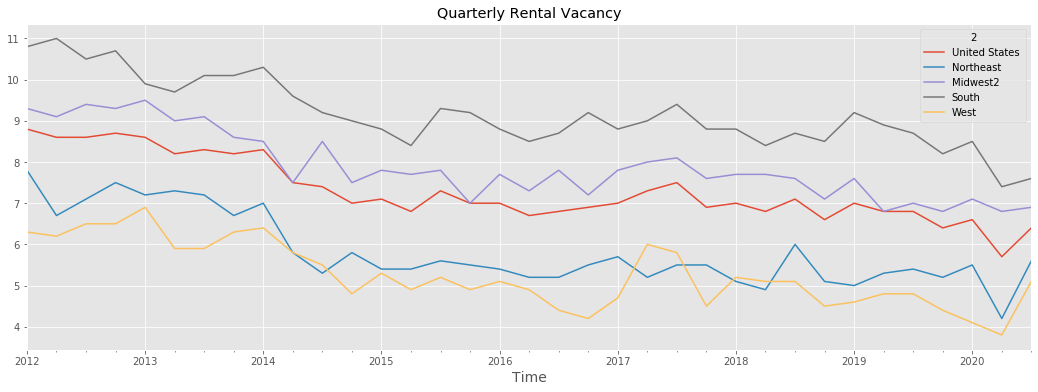

In [28]:
rental_vacancy = rental_vacancy.loc['2012':]
rental_vacancy.plot(figsize=(18,6))
plt.xlabel('Time', fontsize=14);
plt.title('Quarterly Rental Vacancy')

### Property values between 500k and 700k will be selected to make sure the properties aren't too large.

Having a larger quantity of smaller properties will allow the investors to diversify and keep their monthly revenue in the possible situation that they have an altercation at a property.

In [29]:
last_month = ny.last('M')
last_month.head()

,Zipcode,City,State,CountyName,value
time,,,,,
2018-04-01,10467,New York,NY,Bronx,417900.0
2018-04-01,11226,New York,NY,Kings,963200.0
2018-04-01,11375,New York,NY,Queens,1084600.0
2018-04-01,11235,New York,NY,Kings,816200.0
2018-04-01,10011,New York,NY,New York,11478300.0


In [30]:
ny_over = last_month[last_month['value'] <= 700000]

In [31]:
ny_under = ny_over[ny_over['value'] >= 500000]

In [32]:
ny_under.head()

,Zipcode,City,State,CountyName,value
time,,,,,
2018-04-01,11234,New York,NY,Kings,593300.0
2018-04-01,10314,New York,NY,Richmond,555600.0
2018-04-01,11385,New York,NY,Queens,657500.0
2018-04-01,11224,New York,NY,Kings,517900.0
2018-04-01,10306,New York,NY,Richmond,538200.0


### Still, there are 80 zipcodes that meet the aforementioned criteria.

This is still many zipcodes, so further narrowing is needed.

In [33]:
ny_under.Zipcode.nunique()

80

### New York County Map

![SegmentLocal](data/new-york-county-map.gif "segment")

In [34]:
ny_under.CountyName.value_counts()

Westchester    25
Nassau         14
Queens         13
Suffolk        11
Richmond       10
Rockland        4
Kings           2
Bronx           1
Name: CountyName, dtype: int64

### Narrowing by Population Density: Queens

source: https://www.towncharts.com/New-York/Top-25-Counties-in-New-York-ranked-by-Population-Density.html

![SegmentLocal](data/population-density "segment")

### Data from Queens County will be used. 

Queens County has both a high population density and also has a large amount of data available for modeling. The real estate investment company may also benefit by setting their headquarters outside of New York city to avoid exorbitant rent prices.

In [35]:
queens = ny_under[ny_under['CountyName'] == 'Queens'] 

In [36]:
queens.head()

,Zipcode,City,State,CountyName,value
time,,,,,
2018-04-01,11385,New York,NY,Queens,657500.0
2018-04-01,11414,New York,NY,Queens,669800.0
2018-04-01,11378,New York,NY,Queens,696100.0
2018-04-01,11421,New York,NY,Queens,547100.0
2018-04-01,11418,New York,NY,Queens,611500.0


### Unique zipcodes in the dataset can be identified.

In [37]:
queens_codes = queens.Zipcode.unique()

In [38]:
queens_codes.size

13

In [39]:
queens_codes

array([11385, 11414, 11378, 11421, 11418, 11423, 11369, 11417, 11427,
       11426, 11428, 11004, 11416])

In [40]:
ny.drop(columns= ['City', 'State', 'CountyName'], inplace = True)


In [41]:
ny.head()

,Zipcode,value
time,,
2012-01-01,10467,306400.0
2012-01-01,11226,545300.0
2012-01-01,11375,687000.0
2012-01-01,11235,542400.0
2012-01-01,10011,7103800.0


### Grouping Queen County Values by Zipcode

In [42]:
queens_grouped = ny.groupby(['Zipcode'], as_index = True).resample('M').sum()

In [43]:
queens_grouped.head()

Zipcode      value
Zipcode time                          
10011   2012-01-31    10011  7103800.0
        2012-02-29    10011  7428300.0
        2012-03-31    10011  7694600.0
        2012-04-30    10011  7872000.0
        2012-05-31    10011  7994800.0

### Dropping Zipcode Column

In [44]:
queens_grouped.drop(columns = 'Zipcode', inplace = True)

In [45]:
queens_grouped.head()

value
Zipcode time                 
10011   2012-01-31  7103800.0
        2012-02-29  7428300.0
        2012-03-31  7694600.0
        2012-04-30  7872000.0
        2012-05-31  7994800.0

# ARIMA Modeling New York State Zipcodes

### ACF & PACF

This function can be used to plot the time series, autocorrelation function, and partial autocorrelation function. 

In [46]:
# acf and pacf function

def plot_acf_pacf(ts, figsize=(10,8), lags = 24, zipcode = 'add'):
    '''Plots the ACF and PACF of the time series.'''
    fig,ax = plt.subplots(nrows=3,
                         figsize = figsize)
    
    #plot time series
    ts.plot(ax=ax[0])
    
    #plot acf, pacf
    plot_acf(ts,ax=ax[1], lags=lags)
    plot_pacf(ts, ax=ax[2], lags=lags)
    fig.tight_layout()
    
    fig.suptitle(f'Zipcode: {zipcode}',y=1.1, fontsize=20)
    
    for a in ax[1:]:
        a.xaxis.set_major_locator(matplotlib.ticker.MaxNLocator(min_n_ticks=lags, integer = True))
        a.xaxis.grid()
    return fig,ax


# 11385

In [47]:
three_eight_five = queens_grouped.loc[11385]

In [48]:
three_eight_five.tail()

,value
time,
2017-12-31,634200.0
2018-01-31,639700.0
2018-02-28,644700.0
2018-03-31,651000.0
2018-04-30,657500.0


### ACF & PACF

 - The time series trends positively. 
 - The ACF graph shows a slight decrease over time due to trend. 
 - The PACF graph shows a spike at 1 which would suggest an AR value of 1. 

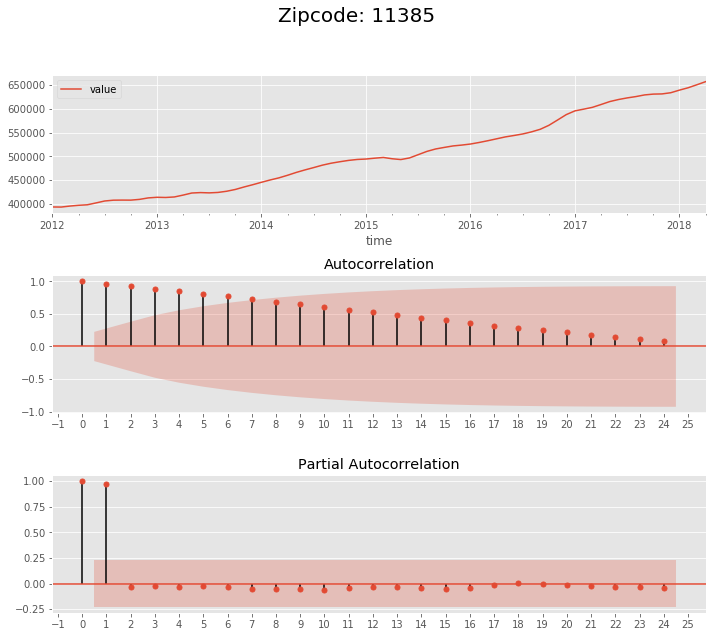

In [49]:
plot_acf_pacf(three_eight_five, zipcode = '11385')
plt.show()

### Decompose Time Series

The seasonality component is displaying an increase of 1000 dollars in value near the turn of the year. 

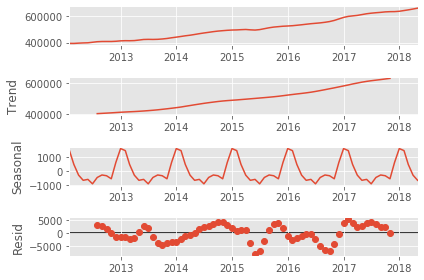

In [50]:
decompose_result = seasonal_decompose(three_eight_five, model="additive")

trend = decompose_result.trend
seasonal = decompose_result.seasonal
residual = decompose_result.resid

decompose_result.plot();

### Fixing Trend: Moving Window Function

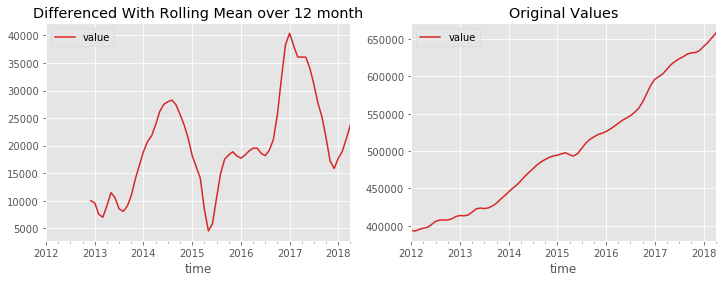

In [51]:
rolling_mean = three_eight_five.rolling(window = 12).mean()
three_eight_five_rolled_detrended = three_eight_five - rolling_mean

ax1 = plt.subplot(121)
three_eight_five_rolled_detrended.plot(figsize=(12,4),color="tab:red", title="Differenced With Rolling Mean over 12 month", ax=ax1);
ax2 = plt.subplot(122)
three_eight_five.plot(figsize=(12,4), color="tab:red", title="Original Values", ax=ax2);

### Testing with the Dicky-Fuller Test

P-value shows stationarity. 

In [52]:
dftest = adfuller(three_eight_five_rolled_detrended.dropna(), autolag = 'AIC')

print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -2.8862402905187308
2. P-Value :  0.04697162091941404
3. Num Of Lags :  3
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 61
5. Critical Values :
	 1% :  -3.542412746661615
	 5% :  -2.910236235808284
	 10% :  -2.5927445767266866


In [53]:
three_eight_five = three_eight_five_rolled_detrended

### SARIMAX Modeling: Parameter Selection

A range from 0 to 3 will allow for a decent model to be built without taking too long.

In [54]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 3)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [55]:
# Run a grid with pdq and seasonal pdq parameters 
#calculated above and get the best (lowest) AIC value
ans = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(three_eight_five,
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            output = mod.fit()
            ans.append([comb, combs, output.aic])
            #print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, combs, output.aic))
        except:
            continue

### Fitting the Time Series Model - ARIMA

In [56]:
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])

In [57]:
best_params = dict(ans_df.loc[ans_df['aic'].idxmin()])
best_params

{'pdq': (1, 2, 2), 'pdqs': (0, 2, 2, 12), 'aic': 419.0915549755504}

In [58]:
best_params['pdq']

(1, 2, 2)

In [59]:
# Plug the optimal parameter values into a new SARIMAX model
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(three_eight_five, 
                                        order= best_params['pdq'], 
                                        seasonal_order=best_params['pdqs'], 
                                        enforce_stationarity=False, 
                                        enforce_invertibility=False)

# Fit the model and print results
output = ARIMA_MODEL.fit()

output.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              value   No. Observations:                   76
Model:             SARIMAX(1, 2, 2)x(0, 2, 2, 12)   Log Likelihood                -203.546
Date:                            Thu, 24 Dec 2020   AIC                            419.092
Time:                                    23:45:33   BIC                            425.905
Sample:                                01-31-2012   HQIC                           420.805
                                     - 04-30-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3745      0.221     -1.695      0.090      -0.808       0.059
ma.L1          1.7162      0.941      1.824      0.068      -0.128       3.560
ma.L2          1.0026      1.109      0.904      0.366      -1.171       3.176
ma.S.L12      -2.1091      1.108     -1.903      0.057      -4.281       0.063
ma.S.L24       1.4365      1.002      1.434      0.152      -0.527       3.400
sigma2      1.161e+06   1.66e-06   6.97e+11      0.000    1.16e+06    1.16e+06
===================================================================================
Ljung-Box (Q):                       16.88   Jarque-Bera (JB):                 0.86
Prob(Q):                              0.77   Prob(JB):                         0.65
Heteroskedasticity (H):               2.44   Skew:                            -0.47
Prob(H) (two-sided):                  0.23   Kurtosis:                         2.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.6e+28. Standard errors may be unstable.
"""

### Plot Diagnostics

 - The standardized residual appears to be from random noise, not seasonality. 
 - The histogram appears to have a fairly normal distribution. 
 - The majority of the Q-Q plot is positively linear.
 - The peaks and valleys in the correlogram fall in the shaded region, indicating that their is not a missed seasonality component.

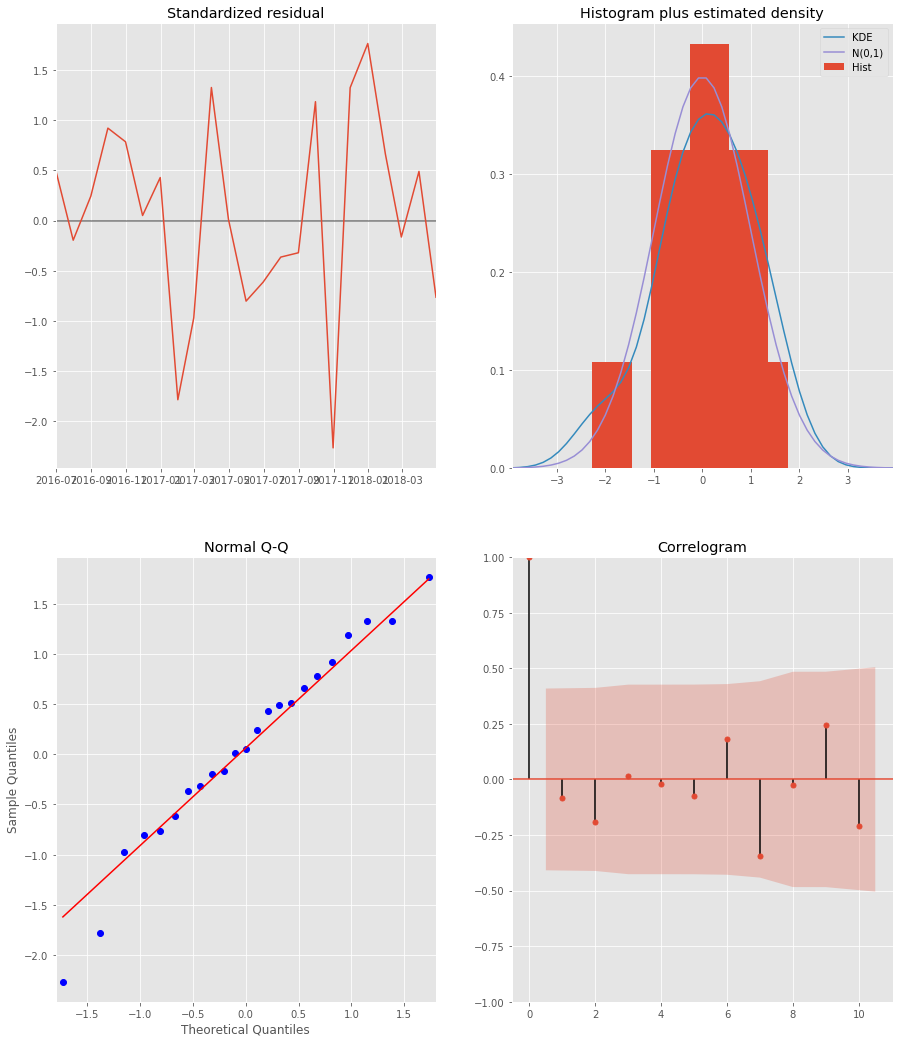

In [60]:
# Call plot_diagnostics() on the results calculated above 
output.plot_diagnostics(figsize=(15, 18))
plt.show()

### Model Validation - One Step Ahead Forecasting:

The data can be split 80% and 20% by indicing at 2017-01-31.

In [61]:
three_eight_five[60:]

,value
time,
2017-01-31,40400.000000
2017-02-28,38150.000000
2017-03-31,36091.666667
2017-04-30,36066.666667
2017-05-31,36058.333333
2017-06-30,34041.666667
2017-07-31,31108.333333
2017-08-31,27708.333333
2017-09-30,25166.666667


In [62]:
pred = output.get_prediction(start=pd.to_datetime('2017-01-31'), dynamic=False)
pred_conf = pred.conf_int()

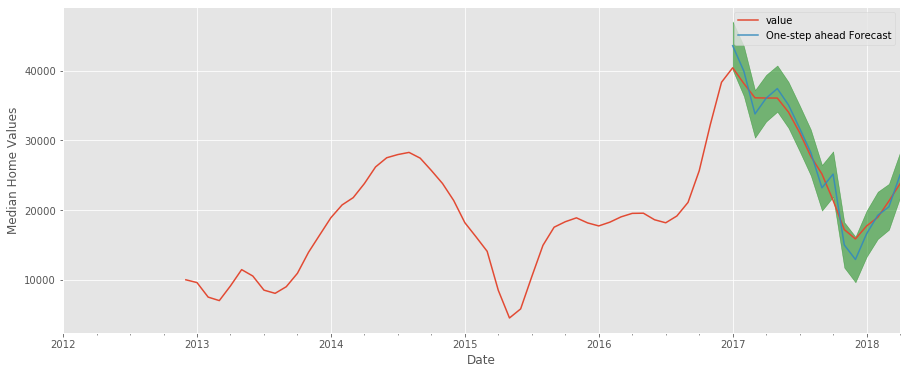

In [63]:

rcParams['figure.figsize'] = 15, 6

ax = three_eight_five['2012-01-31':].plot(label='observed')

pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=0.9)

ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=0.5)

ax.set_xlabel('Date')
ax.set_ylabel('Median Home Values')
plt.legend()

plt.show()

### Accuracy Validation with Root Mean Standard Error (RMSE)

In [64]:
val_forecasted = pred.predicted_mean
val_truth = three_eight_five.loc['2017-01-31':].value

mse = np.sqrt(((val_forecasted - val_truth) ** 2).mean())
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 1892.42


### Model Validation - Dynamic Forecasting

In [65]:
pred_dynamic = output.get_forecast(steps = 24)
pred_dynamic_conf = pred_dynamic.conf_int()


In [66]:
three_eight_five.tail()

,value
time,
2017-12-31,15858.333333
2018-01-31,17716.666667
2018-02-28,18958.333333
2018-03-31,21291.666667
2018-04-30,23783.333333


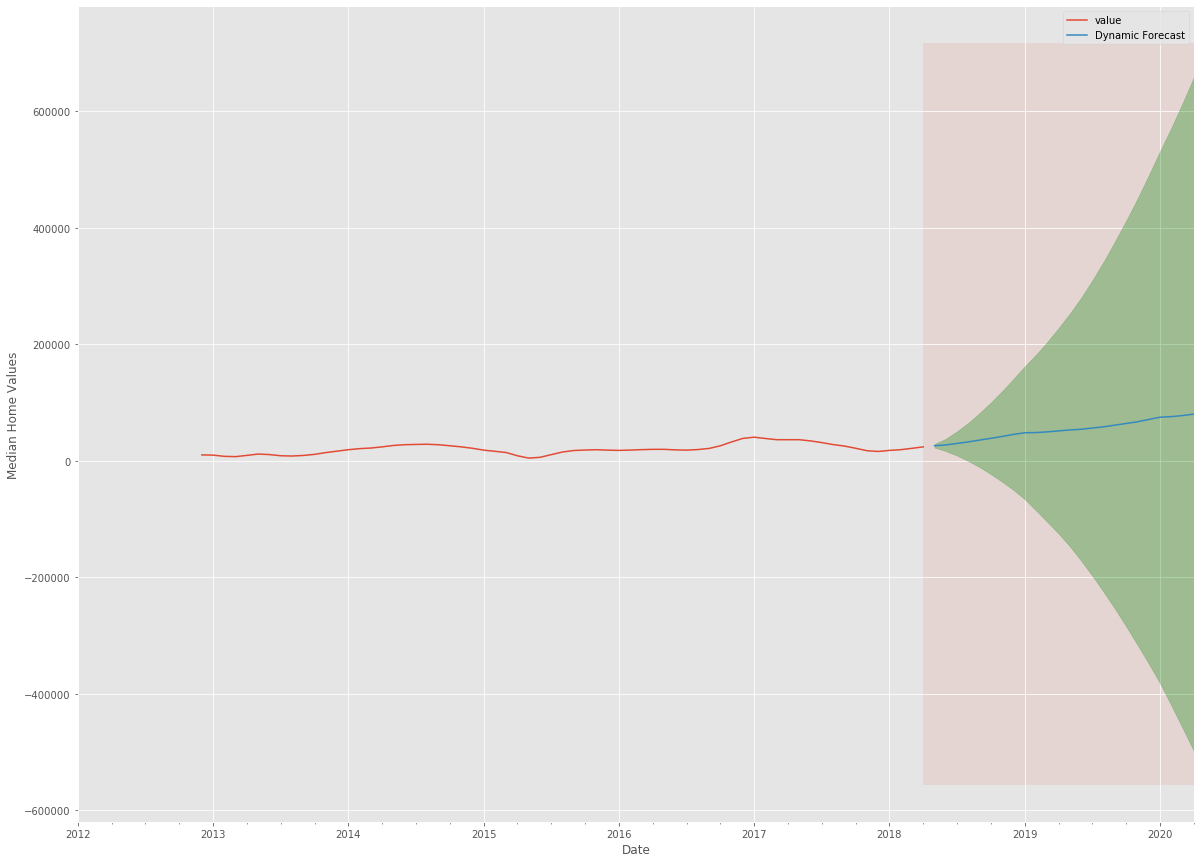

In [67]:
ax = three_eight_five['2012':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_conf.index,
                pred_dynamic_conf.iloc[:, 0],
                pred_dynamic_conf.iloc[:, 1], color='g', alpha=.3)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2020-04-30'), val_forecasted.index[-1], alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Median Home Values')

plt.legend()
plt.show()


### Visualizing Confidence Interval

In [68]:
# Get forecast 24 steps ahead in future.
prediction = output.get_forecast(steps=24)

# Get confidence intervals of forecasts
pred_conf = prediction.conf_int()

pred_conf['mean'] = prediction.predicted_mean

pred_conf.head()

,lower value,upper value,mean
2018-05-31,22464.577564,28919.703291,25692.140428
2018-06-30,16509.348098,37761.595101,27135.471599
2018-07-31,8737.195157,50594.372050,29665.783604
2018-08-31,-565.260445,65218.996909,32326.868232
2018-09-30,-11105.199662,81977.161872,35435.981105


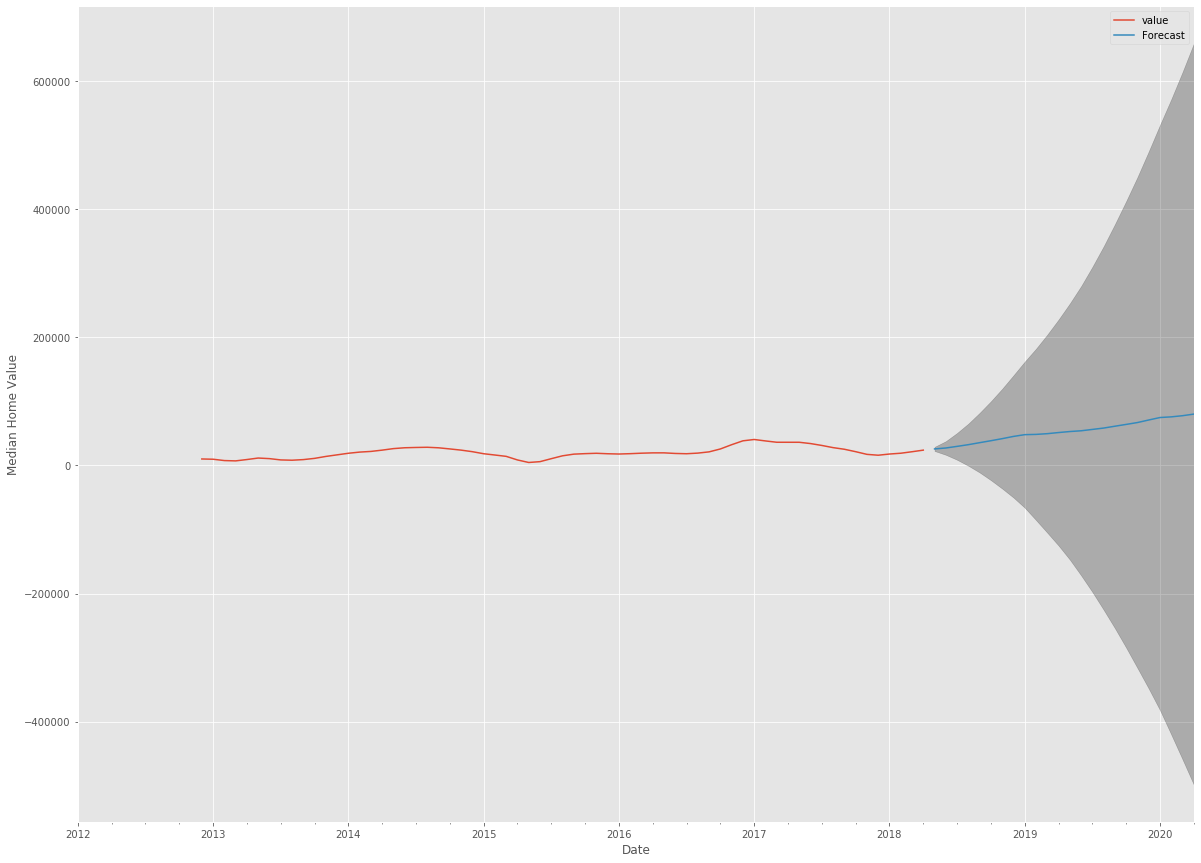

In [69]:
ax = three_eight_five.plot(label='observed', figsize=(20, 15))
prediction.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='k', alpha=0.25)
ax.set_xlabel('Date')
ax.set_ylabel('Median Home Value')

plt.legend()
plt.show()

# Average Return on Investment (ROI)

The earliest predicted mean represents the value or possible cost of the property at the beginning of the real estate investing initiative. We calculate the percentage of return by subtracting cost from the average predicted values and dividing by the cost. Holding on to a percentage allows for comparison between other zipcodes.

In [70]:
#percentage over time is now the mean
#mean change percentage
cost = pred_conf.iloc[0]['mean']
roi = (pred_conf - cost)/ abs(cost) * 100

#pred_conf['result'] = pred_conf[''] - pred_conf['']

roi


,lower value,upper value,mean
2018-05-31,-12.562452,12.562452,0.000000
2018-06-30,-35.741640,46.977225,5.617793
2018-07-31,-65.992732,96.925485,15.466377
2018-08-31,-102.200130,153.848048,25.823959
2018-09-30,-143.224112,219.074863,37.925375
2018-10-31,-189.914296,289.564989,49.825346
2018-11-30,-240.906118,365.506603,62.300243
2018-12-31,-295.350651,447.129131,75.889240
2019-01-31,-357.100413,530.303927,86.601757
2019-02-28,-432.217121,608.687646,88.235262


# Results Dataframe

In [71]:
data = {'Zipcode':  ['11385', '11414', '11378', '11421', '11418', '11423', '11369', '11417', '11427', '11426', '11428', '11004', '11416']}
    
results = pd.DataFrame(data, columns = ['Zipcode'])
results['ROI_Percentage'] = 1
results.head()

,Zipcode,ROI_Percentage
0,11385,1
1,11414,1
2,11378,1
3,11421,1
4,11418,1


In [72]:
results.ROI_Percentage[0] = roi['mean'][-1]
results.head()

,Zipcode,ROI_Percentage
0,11385,211
1,11414,1
2,11378,1
3,11421,1
4,11418,1


# 11414

In [73]:
four_one_four = queens_grouped.loc[11414]

### ACF & PACF

 - The trend in the time series dips and then increases. 
 - ACF decreeases over time due to trend. 
 - PACF cuts off after one. 

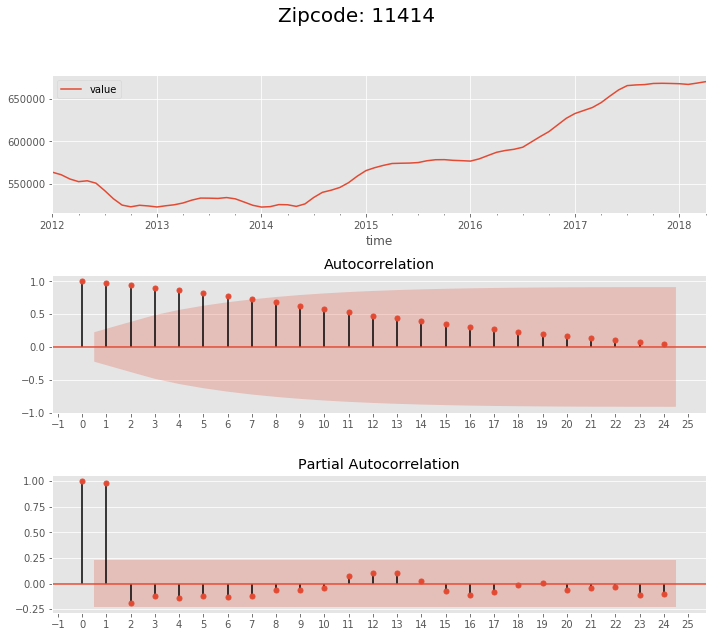

In [74]:
plot_acf_pacf(four_one_four, zipcode = '11414')
plt.show()

### Decompose Time Series

- Trend in the data lulls and then increases.
- The seasonality graph shows a peak in value (increase of over 1000 dollars) after the middle of the year (Summer).

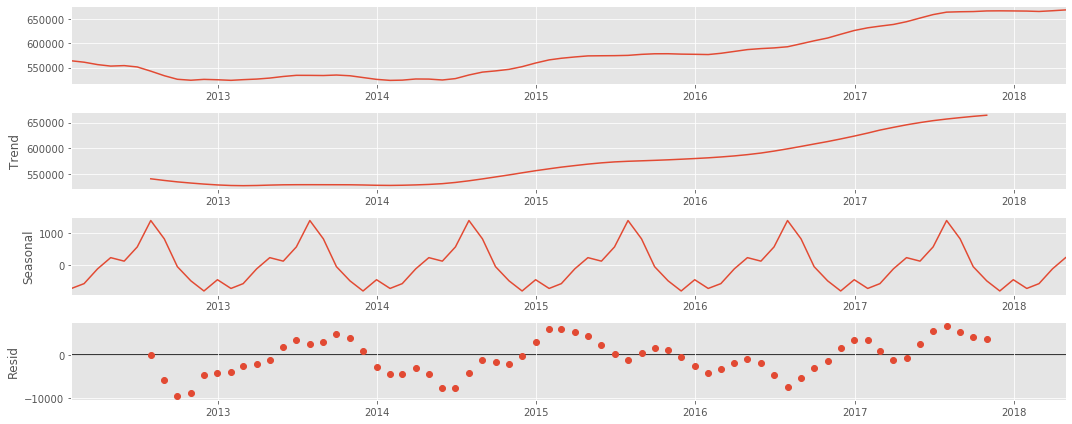

In [75]:
decompose_result = seasonal_decompose(four_one_four, model="additive")

trend = decompose_result.trend
seasonal = decompose_result.seasonal
residual = decompose_result.resid

decompose_result.plot();

### Fixing Trend: Moving Window Function

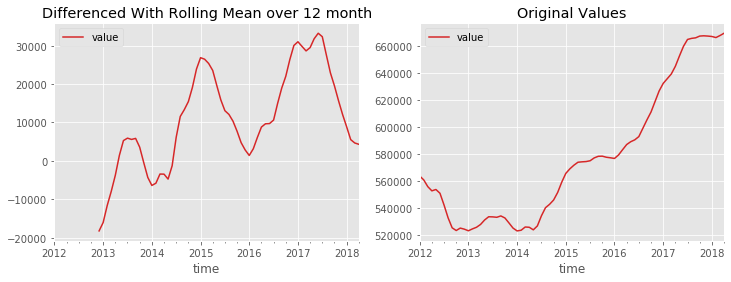

In [76]:
rolling_mean = four_one_four.rolling(window = 12).mean()
four_one_four_rolled_detrended = four_one_four - rolling_mean

ax1 = plt.subplot(121)
four_one_four_rolled_detrended.plot(figsize=(12,4),color="tab:red", title="Differenced With Rolling Mean over 12 month", ax=ax1);
ax2 = plt.subplot(122)
four_one_four.plot(figsize=(12,4), color="tab:red", title="Original Values", ax=ax2);

### Testing with the Dicky-Fuller Test

This did not fix the stationarity of the data.

In [77]:
dftest = adfuller(four_one_four_rolled_detrended.dropna(), autolag = 'AIC')

print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -1.781268046132754
2. P-Value :  0.3898004410466615
3. Num Of Lags :  9
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 55
5. Critical Values :
	 1% :  -3.5552728880540942
	 5% :  -2.9157312396694217
	 10% :  -2.5956695041322315


### Using Differencing with Mean Rolled Time Series for Seasonality

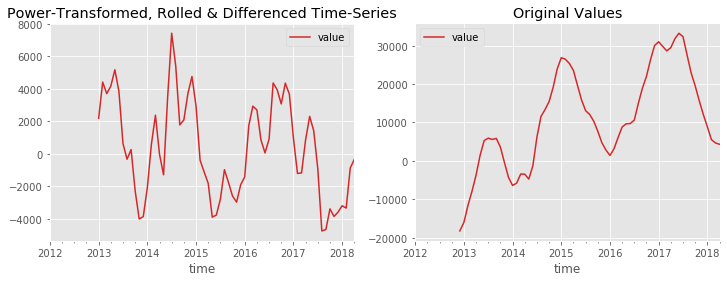

In [78]:
four_one_four_rolled_detrended_diff = four_one_four_rolled_detrended - four_one_four_rolled_detrended.shift()

ax1 = plt.subplot(121)
four_one_four_rolled_detrended_diff.plot(figsize=(8,4), color="tab:red", title="Power-Transformed, Rolled & Differenced Time-Series", ax=ax1);
ax2 = plt.subplot(122)
four_one_four_rolled_detrended.plot(figsize=(12,4), color="tab:red", title="Original Values", ax=ax2);

### Retesting with the Dicky-Fuller Test

Now the data has stationarity.

In [79]:
dftest = adfuller(four_one_four_rolled_detrended_diff.dropna().values, autolag = 'AIC')

print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -3.6953668661418524
2. P-Value :  0.004178797302181956
3. Num Of Lags :  8
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 55
5. Critical Values :
	 1% :  -3.5552728880540942
	 5% :  -2.9157312396694217
	 10% :  -2.5956695041322315


In [80]:
four_one_four = four_one_four_rolled_detrended_diff

### SARIMAX Modeling: Parameter Selection

In [81]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 3)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [82]:
# Run a grid with pdq and seasonal pdq parameters 
#calculated above and get the best (lowest) AIC value
ans = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(four_one_four,
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            output = mod.fit()
            ans.append([comb, combs, output.aic])
            #print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, combs, output.aic))
        except:
            continue

### Fitting the Time Series Model - SARIMAX

In [83]:
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])

In [84]:
best_params = dict(ans_df.loc[ans_df['aic'].idxmin()])
best_params

{'pdq': (0, 2, 2), 'pdqs': (0, 2, 2, 12), 'aic': 431.2847625786172}

In [85]:
best_params['pdq']

(0, 2, 2)

In [86]:
# Plug the optimal parameter values into a new SARIMAX model
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(four_one_four, 
                                        order= best_params['pdq'], 
                                        seasonal_order=best_params['pdqs'], 
                                        enforce_stationarity=False, 
                                        enforce_invertibility=False)

# Fit the model and print results
output = ARIMA_MODEL.fit()

output.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              value   No. Observations:                   76
Model:             SARIMAX(0, 2, 2)x(0, 2, 2, 12)   Log Likelihood                -210.642
Date:                            Fri, 25 Dec 2020   AIC                            431.285
Time:                                    00:48:56   BIC                            436.962
Sample:                                01-31-2012   HQIC                           432.713
                                     - 04-30-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4397      2.410     -0.182      0.855      -5.163       4.284
ma.L2         -0.5653      1.239     -0.456      0.648      -2.994       1.863
ma.S.L12      -2.4002      0.788     -3.045      0.002      -3.945      -0.855
ma.S.L24       1.6105      2.168      0.743      0.458      -2.638       5.860
sigma2      1.927e+06   5.71e+06      0.337      0.736   -9.27e+06    1.31e+07
===================================================================================
Ljung-Box (Q):                       16.35   Jarque-Bera (JB):                 0.45
Prob(Q):                              0.80   Prob(JB):                         0.80
Heteroskedasticity (H):               1.26   Skew:                             0.08
Prob(H) (two-sided):                  0.75   Kurtosis:                         2.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Plot Diagnostics

- The standardized residual seems to show noise rather than a pattern.
- The histogram is normally distributed.
- The points on the QQ plot follow the line closely. 
- The points in the correlogram fall inside the box and do not indidcate a missed seasonality component. 

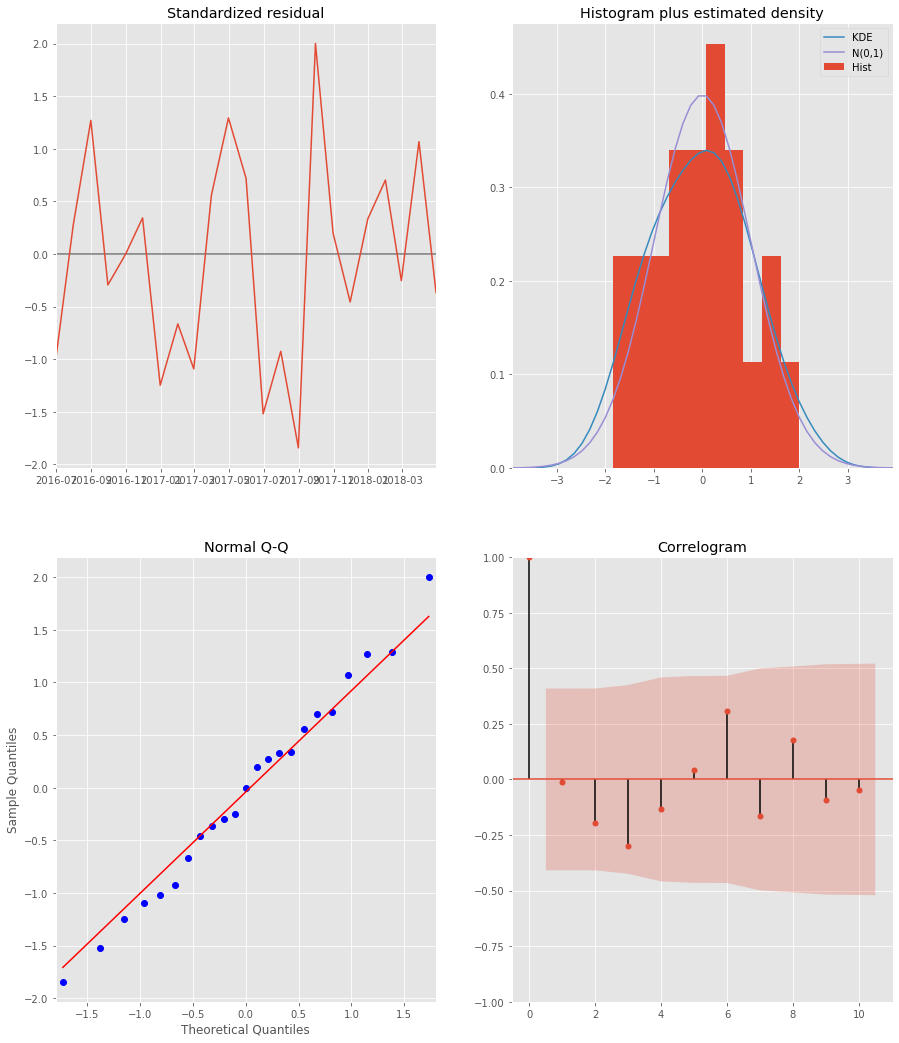

In [87]:
# Call plot_diagnostics() on the results calculated above 
output.plot_diagnostics(figsize=(15, 18))
plt.show()

### Model Validation - One Step Ahead Forecasting:

The data can be split 80% and 20% by indicing at 2017-01-31.

In [88]:
four_one_four[60:]

,value
time,
2017-01-31,966.666667
2017-02-28,-1208.333333
2017-03-31,-1175.000000
2017-04-30,866.666667
2017-05-31,2308.333333
2017-06-30,1425.000000
2017-07-31,-900.000000
2017-08-31,-4750.000000
2017-09-30,-4666.666667


In [89]:
pred = output.get_prediction(start=pd.to_datetime('2017-01-31'), dynamic=False)
pred_conf = pred.conf_int()

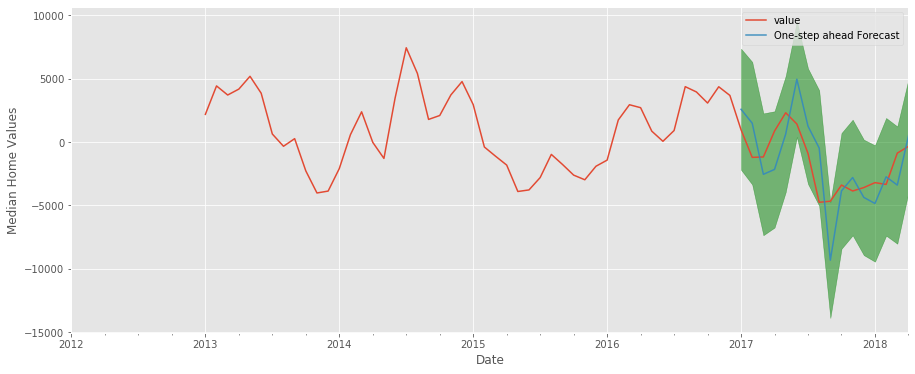

In [90]:

rcParams['figure.figsize'] = 15, 6

ax = four_one_four['2012':].plot(label='observed')

pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=0.9)

ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=0.5)

ax.set_xlabel('Date')
ax.set_ylabel('Median Home Values')
plt.legend()

plt.show()

### Accuracy Validation with RMSE (Root Mean Squared Error)

In [91]:
val_forecasted = pred.predicted_mean
val_truth = four_one_four.loc['2017-01-31':].value

mse = np.sqrt(((val_forecasted - val_truth) ** 2).mean())
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 2407.35


### Model Validation - Dynamic Forecasting

In [92]:
pred_dynamic = output.get_forecast(steps = 24)
pred_dynamic_conf = pred_dynamic.conf_int()


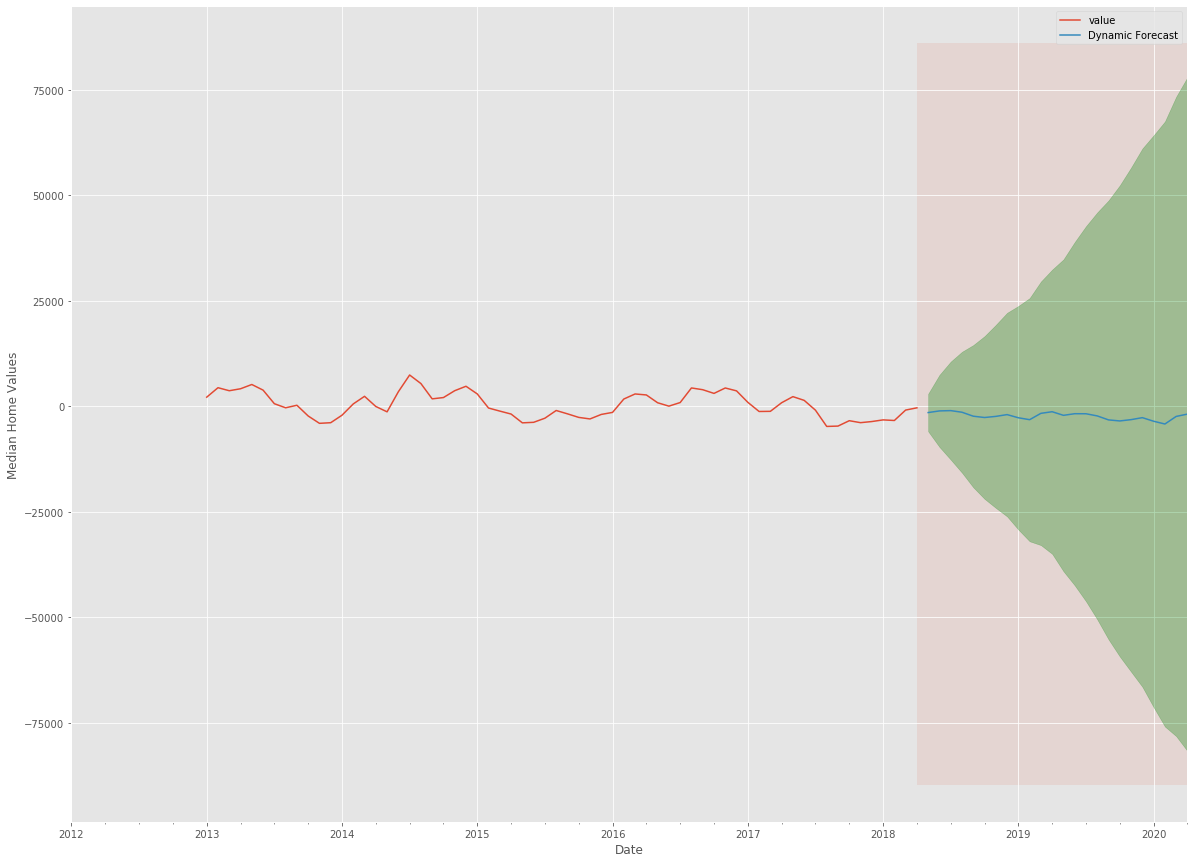

In [93]:
ax = four_one_four['2012':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_conf.index,
                pred_dynamic_conf.iloc[:, 0],
                pred_dynamic_conf.iloc[:, 1], color='g', alpha=.3)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2020-04-30'), val_forecasted.index[-1], alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Median Home Values')

plt.legend()
plt.show()


### Visualizing Confidence Interval

In [94]:
# Get forecast 24 steps ahead in future
prediction = output.get_forecast(steps=24)

# Get confidence intervals of forecasts
pred_conf = prediction.conf_int()

pred_conf['mean'] = prediction.predicted_mean

pred_conf.head()

,lower value,upper value,mean
2018-05-31,-5917.360611,2988.328956,-1464.515828
2018-06-30,-9611.429817,7462.855660,-1074.287078
2018-07-31,-12617.815542,10609.816855,-1003.999344
2018-08-31,-15713.890501,12938.268566,-1387.810968
2018-09-30,-19173.684568,14520.929364,-2326.377602


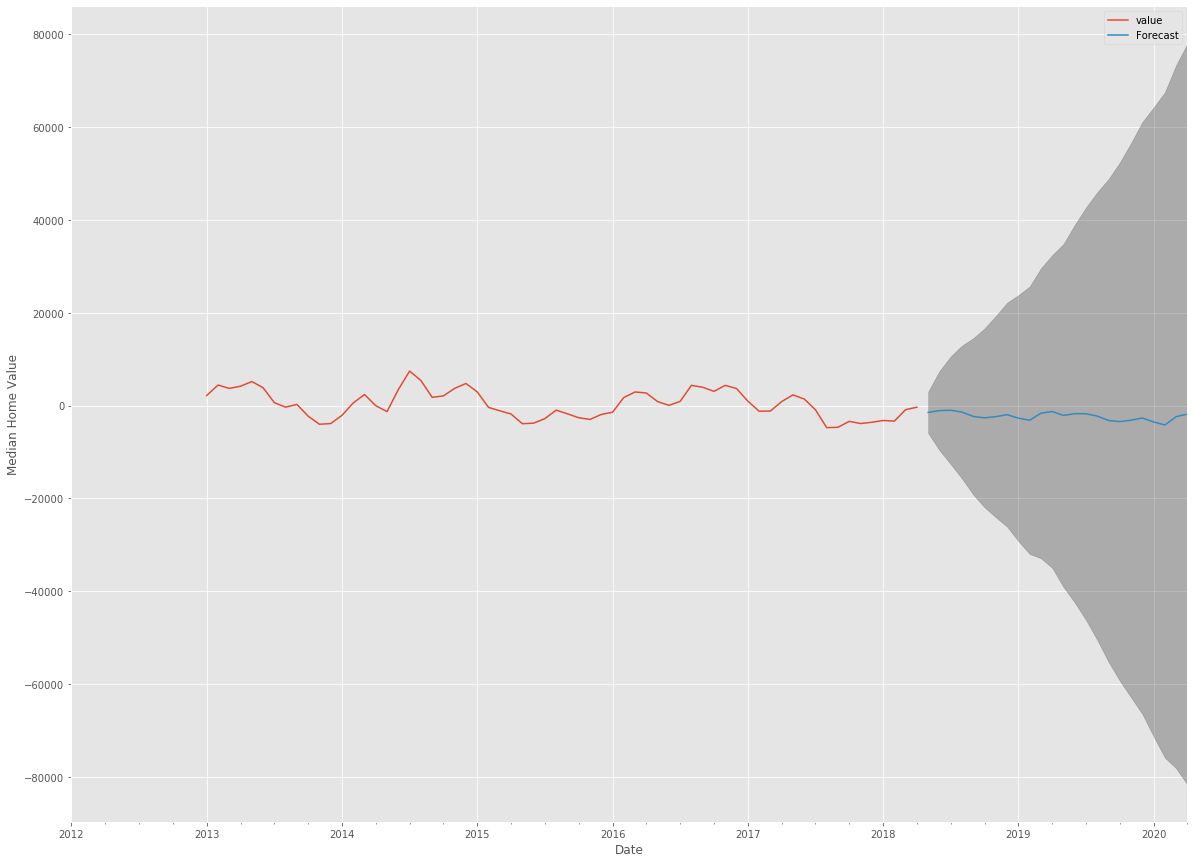

In [95]:
ax = four_one_four.plot(label='observed', figsize=(20, 15))
prediction.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='k', alpha=0.25)
ax.set_xlabel('Date')
ax.set_ylabel('Median Home Value')

plt.legend()
plt.show()

# Average Return on Investment (ROI) Percentage

The earliest predicted mean represents the value or possible cost of the property at the beginning of the real estate investing initiative. We calculate the percentage of return by subtracting cost from the average predicted values and dividing by the cost. Holding on to a percentage allows for comparison between other zipcodes.

In [96]:
cost = pred_conf.iloc[0]['mean']
roi = (pred_conf - cost)/ abs(cost) * 100

roi


,lower value,upper value,mean
2018-05-31,-304.048935,304.048935,0.000000
2018-06-30,-556.287193,609.578355,26.645581
2018-07-31,-761.569080,824.459009,31.444965
2018-08-31,-972.975123,983.450238,5.237558
2018-09-30,-1209.216617,1091.517407,-58.849605
2018-10-31,-1395.966157,1235.927040,-80.019558
2018-11-30,-1542.057393,1418.245239,-61.906077
2018-12-31,-1679.629021,1613.563360,-33.032831
2019-01-31,-1892.590067,1724.231411,-84.179328
2019-02-28,-2081.915419,1851.550792,-115.182314


# Results Dataframe

In [97]:
results.ROI_Percentage[1] = roi['mean'][-1]
results.head()

,Zipcode,ROI_Percentage
0,11385,211
1,11414,-24
2,11378,1
3,11421,1
4,11418,1


# 11378

In [98]:
three_seven_eight = queens_grouped.loc[11378]

In [99]:
three_seven_eight.tail()

,value
time,
2017-12-31,678600.0
2018-01-31,680200.0
2018-02-28,683500.0
2018-03-31,689500.0
2018-04-30,696100.0


### ACF & PACF

- Strong positive trend is evident. 
- Steady decrease in autocorrelation is due to trend. 
- Partial autocorrelation cuts off after 1. 

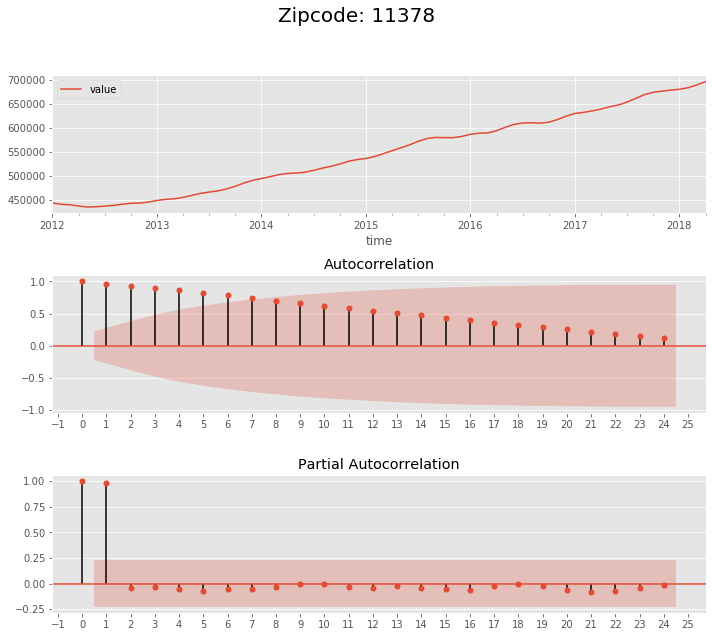

In [100]:
plot_acf_pacf(three_seven_eight, zipcode = '11378')
plt.show()

### Decompose Time Series

- Strong positive trend is evident.
- Seasonality causes a price decrease in March/April and November.

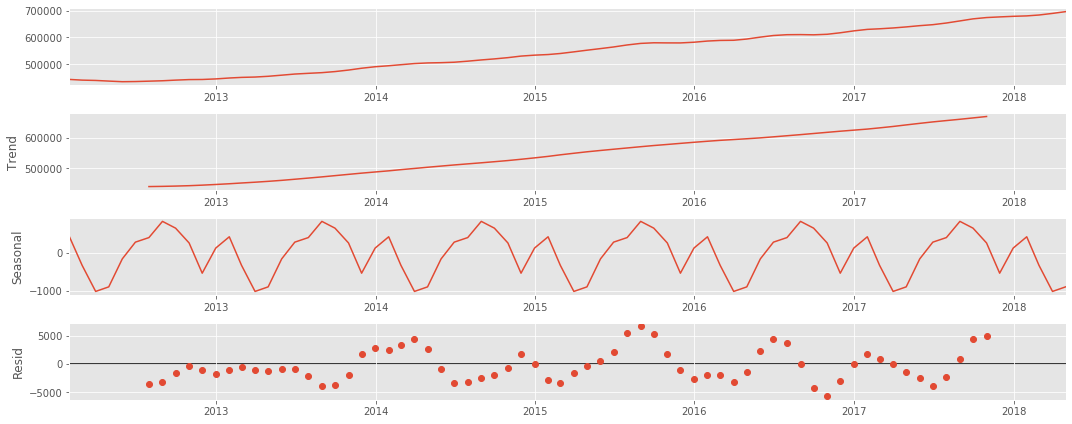

In [101]:
decompose_result = seasonal_decompose(three_seven_eight, model="additive")

trend = decompose_result.trend
seasonal = decompose_result.seasonal
residual = decompose_result.resid

decompose_result.plot();

### Fixing Trend: Moving Window Function

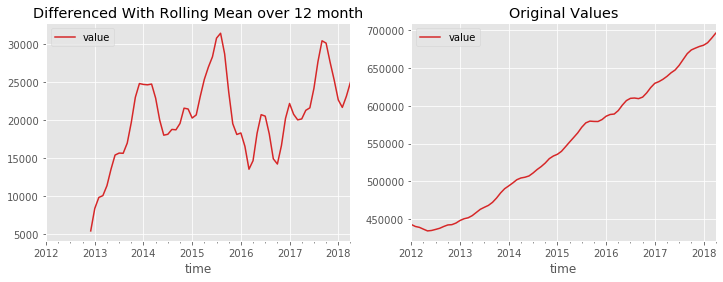

In [102]:
rolling_mean = three_seven_eight.rolling(window = 12).mean()
three_seven_eight_rolled_detrended = three_seven_eight - rolling_mean

ax1 = plt.subplot(121)
three_seven_eight_rolled_detrended.plot(figsize=(12,4),color="tab:red", title="Differenced With Rolling Mean over 12 month", ax=ax1);
ax2 = plt.subplot(122)
three_seven_eight.plot(figsize=(12,4), color="tab:red", title="Original Values", ax=ax2);

### Testing with the Dicky-Fuller Test

P-value reflects that the moving window function created stationarity and corrected for trend. 

In [103]:
dftest = adfuller(three_seven_eight_rolled_detrended.dropna(), autolag = 'AIC')

print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -3.2737170917143987
2. P-Value :  0.016094985135885226
3. Num Of Lags :  3
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 61
5. Critical Values :
	 1% :  -3.542412746661615
	 5% :  -2.910236235808284
	 10% :  -2.5927445767266866


In [104]:
three_seven_eight = three_seven_eight_rolled_detrended

### SARIMAX Modeling: Parameter Selection

In [105]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 3)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [106]:
# Run a grid with pdq and seasonal pdq parameters 
#calculated above and get the best (lowest) AIC value
ans = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(three_seven_eight,
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            output = mod.fit()
            ans.append([comb, combs, output.aic])
            #print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, combs, output.aic))
        except:
            continue

### Fitting the Time Series Model - SARIMAX

In [107]:
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])

In [108]:
best_params = dict(ans_df.loc[ans_df['aic'].idxmin()])
best_params

{'pdq': (2, 2, 2), 'pdqs': (0, 2, 2, 12), 'aic': 415.2140852291404}

In [109]:
best_params['pdq']

(2, 2, 2)

In [110]:
# Plug the optimal parameter values into a new SARIMAX model
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(three_seven_eight, 
                                        order= best_params['pdq'], 
                                        seasonal_order=best_params['pdqs'], 
                                        enforce_stationarity=False, 
                                        enforce_invertibility=False)

# Fit the model and print results
output = ARIMA_MODEL.fit()

output.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              value   No. Observations:                   76
Model:             SARIMAX(2, 2, 2)x(0, 2, 2, 12)   Log Likelihood                -200.607
Date:                            Fri, 25 Dec 2020   AIC                            415.214
Time:                                    00:57:30   BIC                            423.163
Sample:                                01-31-2012   HQIC                           417.213
                                     - 04-30-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9957      0.258      3.856      0.000       0.490       1.502
ar.L2         -0.6865      0.241     -2.851      0.004      -1.159      -0.215
ma.L1         -0.6559      0.370     -1.774      0.076      -1.381       0.069
ma.L2         -0.1464      0.416     -0.351      0.725      -0.963       0.670
ma.S.L12      -1.8406      0.575     -3.200      0.001      -2.968      -0.713
ma.S.L24       1.0953      0.740      1.480      0.139      -0.355       2.546
sigma2      1.552e+06   6.74e-07    2.3e+12      0.000    1.55e+06    1.55e+06
===================================================================================
Ljung-Box (Q):                       15.06   Jarque-Bera (JB):                 1.90
Prob(Q):                              0.86   Prob(JB):                         0.39
Heteroskedasticity (H):               1.34   Skew:                            -0.15
Prob(H) (two-sided):                  0.69   Kurtosis:                         1.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.05e+29. Standard errors may be unstable.
"""

### Plot Diagnostics

- The standardized residual model appears to represent noise. 
- The histogram and KDE do not appear to be normally distributed.
- The QQ plot flares slightly away from the line. 
- The correlogram does not show a missed seasonality component. 

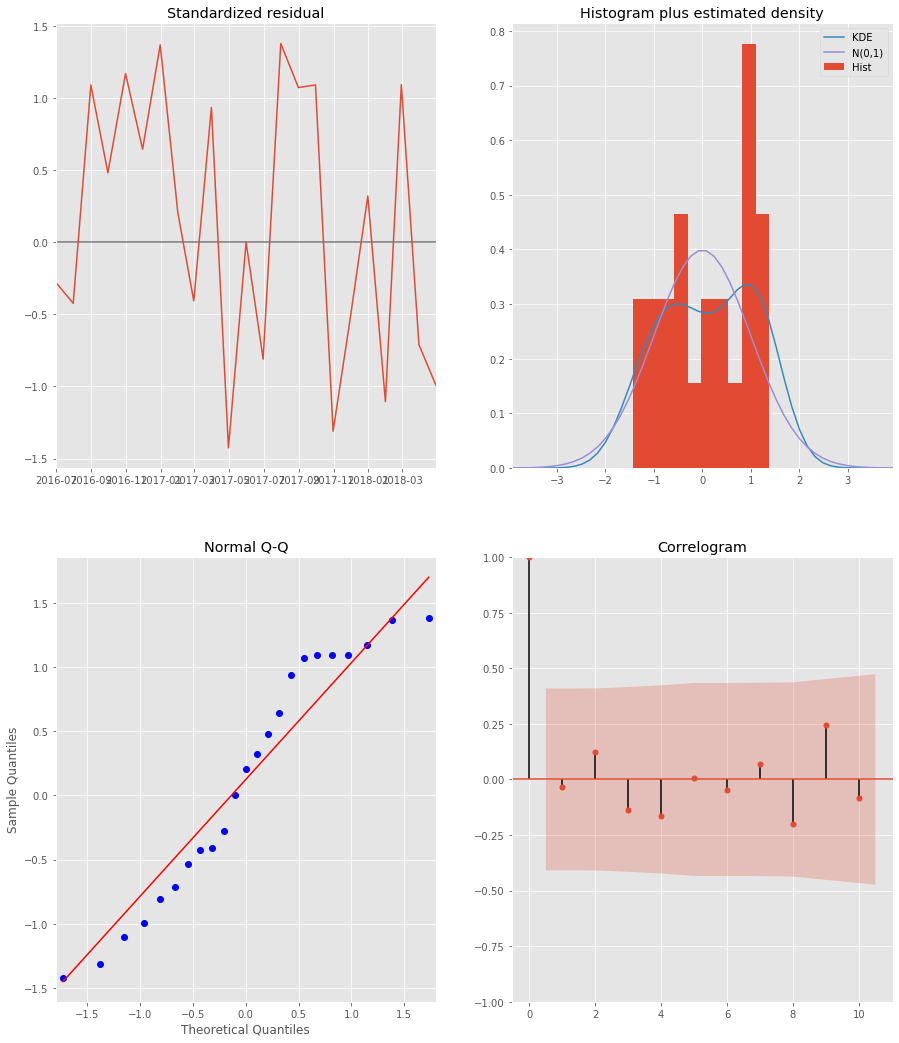

In [111]:
# Call plot_diagnostics() on the results calculated above 
output.plot_diagnostics(figsize=(15, 18))
plt.show()

### Model Validation - One Step Ahead Forecasting:

The data can be split 80% and 20% by indicing at 2017-01-31.

In [112]:
three_seven_eight[60:]

,value
time,
2017-01-31,22183.333333
2017-02-28,20758.333333
2017-03-31,20025.000000
2017-04-30,20150.000000
2017-05-31,21283.333333
2017-06-30,21608.333333
2017-07-31,24166.666667
2017-08-31,27708.333333
2017-09-30,30441.666667


In [113]:
pred = output.get_prediction(start=pd.to_datetime('2017-01-31'), dynamic=False)
pred_conf = pred.conf_int()

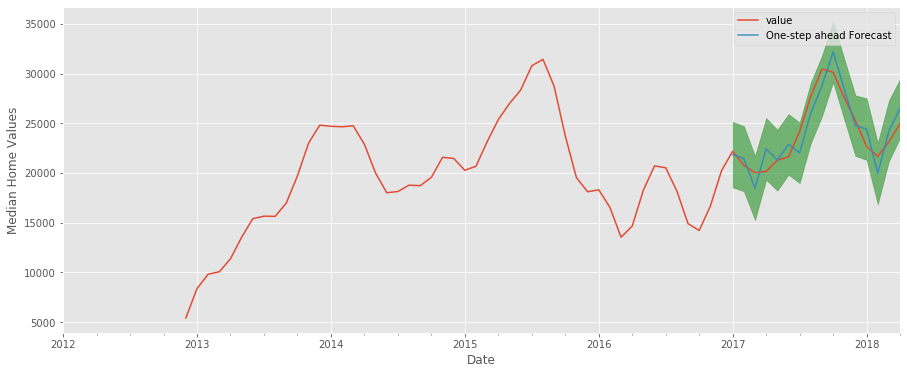

In [114]:

rcParams['figure.figsize'] = 15, 6

ax = three_seven_eight['2012':].plot(label='observed')

pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=0.9)

ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=0.5)

ax.set_xlabel('Date')
ax.set_ylabel('Median Home Values')
plt.legend()

plt.show()

### Accuracy Validation with RMSE (Root Mean Squared Error)

In [115]:
val_forecasted = pred.predicted_mean
val_truth = three_seven_eight.loc['2017-01-31':].value

mse = np.sqrt(((val_forecasted - val_truth) ** 2).mean())
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 1472.03


### Model Validation - Dynamic Forecasting

In [116]:
pred_dynamic = output.get_forecast(steps = 24)
pred_dynamic_conf = pred_dynamic.conf_int()


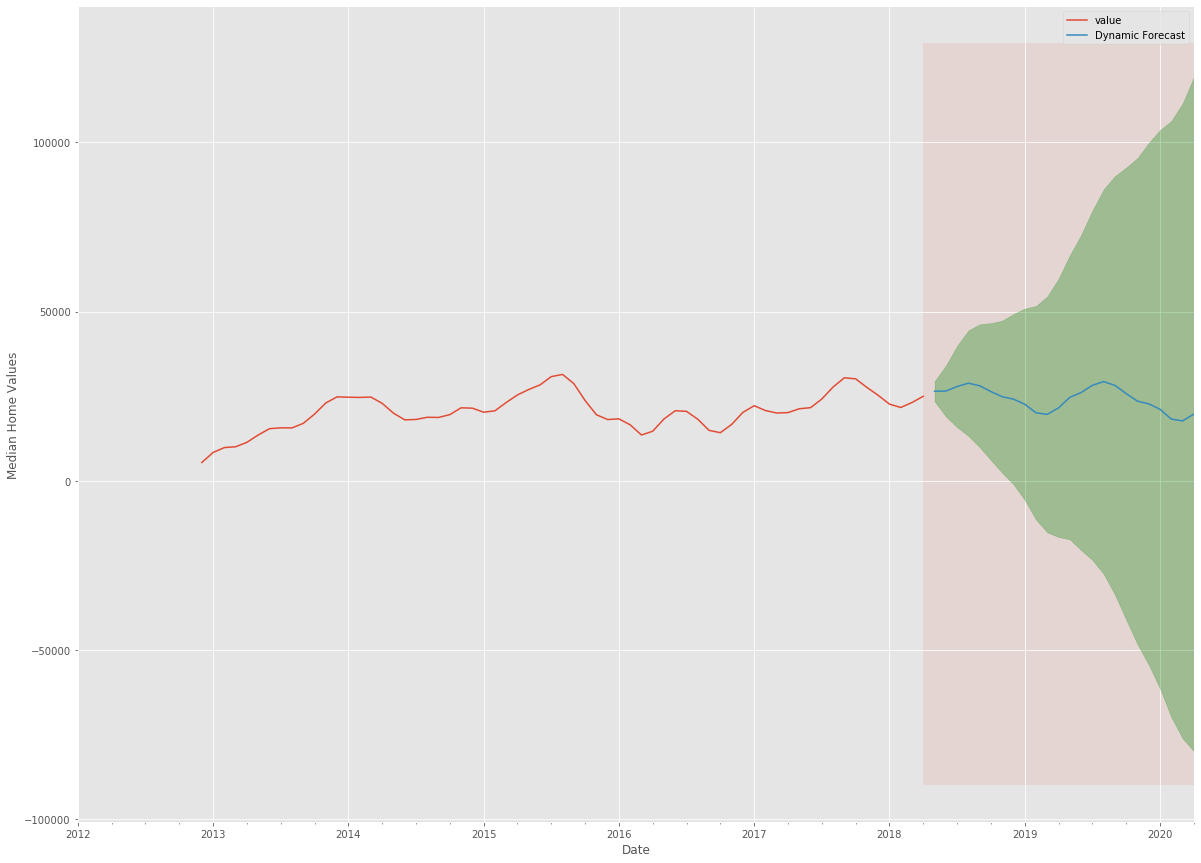

In [117]:
ax = three_seven_eight['2012':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_conf.index,
                pred_dynamic_conf.iloc[:, 0],
                pred_dynamic_conf.iloc[:, 1], color='g', alpha=.3)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2020-04-30'), val_forecasted.index[-1], alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Median Home Values')

plt.legend()
plt.show()


### Visualizing Confidence Interval

In [118]:
# Get forecast 24 steps ahead in future
prediction = output.get_forecast(steps=24)

# Get confidence intervals of forecasts
pred_conf = prediction.conf_int()

pred_conf['mean'] = prediction.predicted_mean

pred_conf.head()

,lower value,upper value,mean
2018-05-31,23501.533594,29402.816918,26452.175256
2018-06-30,19037.567463,33995.738986,26516.653225
2018-07-31,15825.366446,39880.140861,27852.753653
2018-08-31,13253.252746,44438.233113,28845.742930
2018-09-30,9935.128984,46245.861510,28090.495247


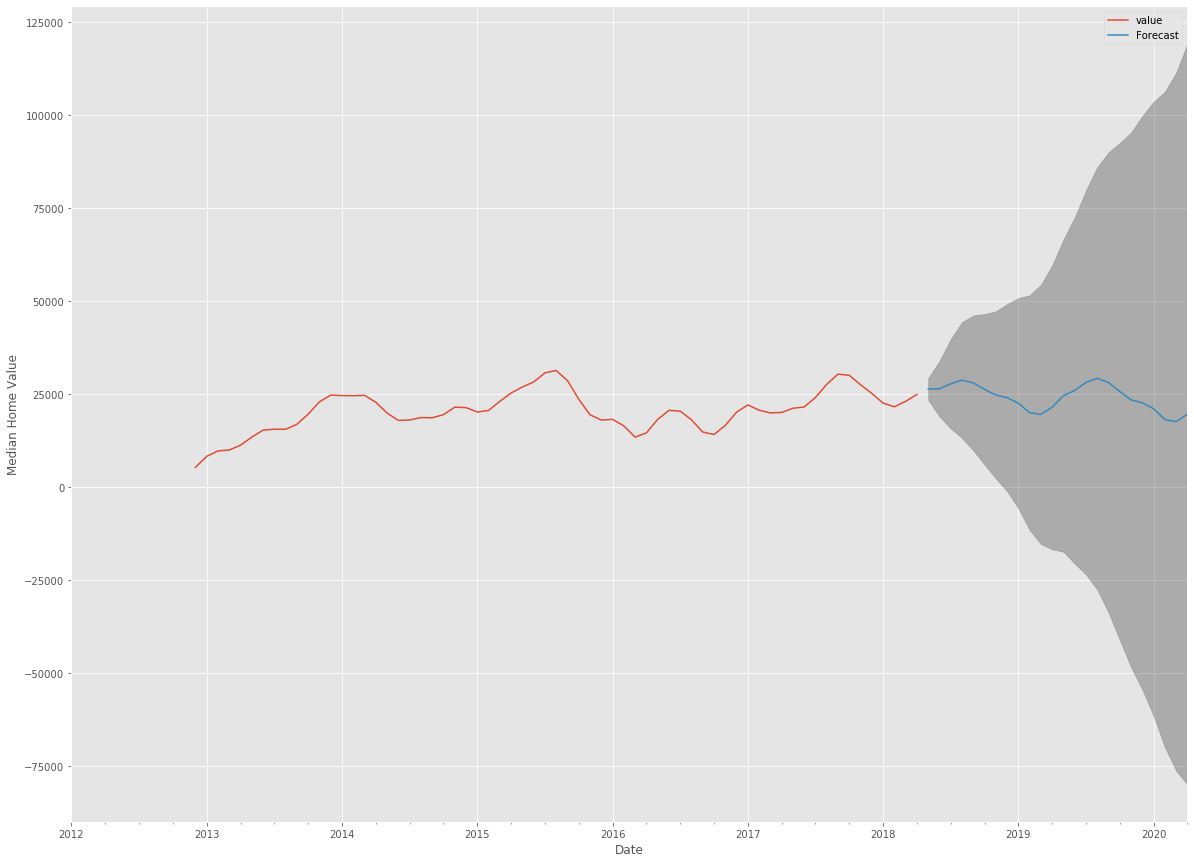

In [119]:
ax = three_seven_eight.plot(label='observed', figsize=(20, 15))
prediction.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='k', alpha=0.25)
ax.set_xlabel('Date')
ax.set_ylabel('Median Home Value')

plt.legend()
plt.show()

# Average Return on Investment (ROI) Percentage

The earliest predicted mean represents the value or possible cost of the property at the beginning of the real estate investing initiative. We calculate the percentage of return by subtracting cost from the average predicted values and dividing by the cost. Holding on to a percentage allows for comparison between other zipcodes.

In [120]:
cost = pred_conf.iloc[0]['mean']
roi = (pred_conf - cost)/ abs(cost) * 100

roi



,lower value,upper value,mean
2018-05-31,-11.154628,11.154628,0.000000
2018-06-30,-28.030238,28.517744,0.243753
2018-07-31,-40.173667,50.763181,5.294757
2018-08-31,-49.897305,67.994627,9.048661
2018-09-30,-62.441165,74.828199,6.193517
2018-10-31,-76.916986,76.205890,-0.355548
2018-11-30,-91.044910,78.891343,-6.076784
2018-12-31,-103.936472,86.377999,-8.779236
2019-01-31,-121.311319,92.407328,-14.451995
2019-02-28,-143.359690,95.249479,-24.055105


# Results Dataframe

In [121]:
results.ROI_Percentage[2] = roi['mean'][-1]
results.head()


,Zipcode,ROI_Percentage
0,11385,211
1,11414,-24
2,11378,-25
3,11421,1
4,11418,1


# 11421

In [122]:
four_two_one = queens_grouped.loc[11421]

In [123]:
four_two_one.tail()

,value
time,
2017-12-31,523700.0
2018-01-31,529400.0
2018-02-28,536100.0
2018-03-31,542700.0
2018-04-30,547100.0


### ACF & PACF

- The time series shows a positive trend over time.
- The autocorrelation decreases over time due to trend.
- The partial autocorrelation cuts off after one. 

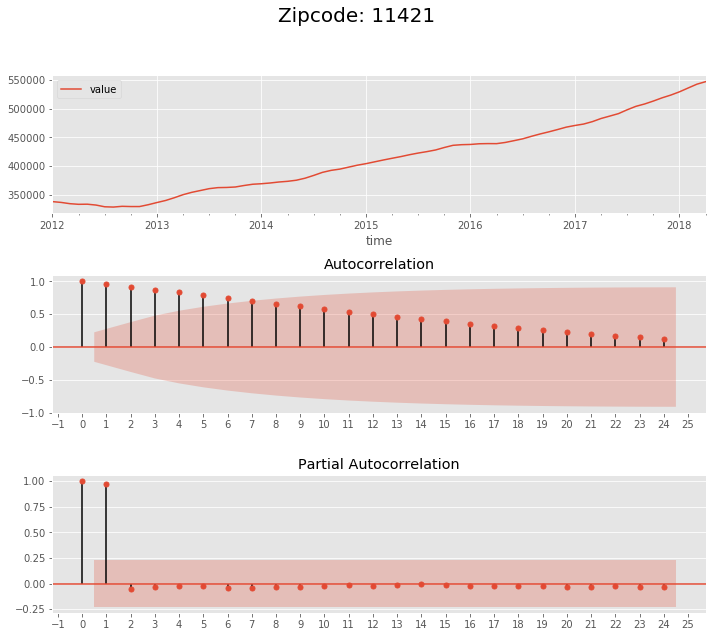

In [124]:
plot_acf_pacf(four_two_one, zipcode = '11421')
plt.show()

### Decompose Time Series

- The time series shows a positive trend over time. 
- The seasonality shows that the value is closest to the mean in September, then peaks into the new year and then dips drastically until around May when it spikes before the September dip. 
- The residuals appear to have no defined pattern. 

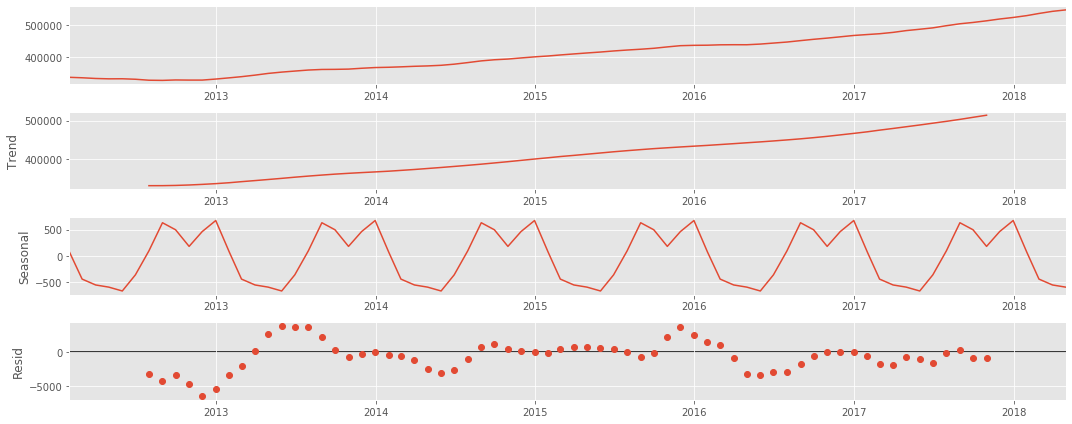

In [125]:
decompose_result = seasonal_decompose(four_two_one, model="additive")

trend = decompose_result.trend
seasonal = decompose_result.seasonal
residual = decompose_result.resid

decompose_result.plot();

### Fixing Trend: Moving Window Function

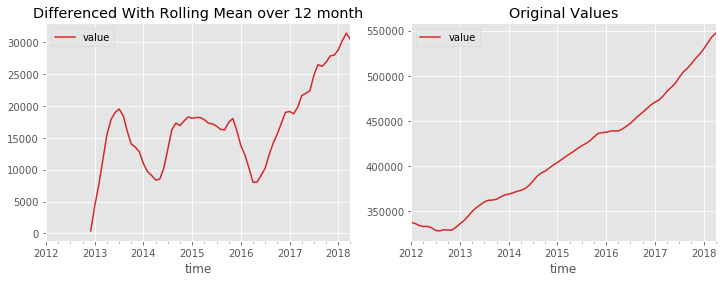

In [126]:
rolling_mean = four_two_one.rolling(window = 12).mean()
four_two_one_rolled_detrended = four_two_one - rolling_mean

ax1 = plt.subplot(121)
four_two_one_rolled_detrended.plot(figsize=(12,4),color="tab:red", title="Differenced With Rolling Mean over 12 month", ax=ax1);
ax2 = plt.subplot(122)
four_two_one.plot(figsize=(12,4), color="tab:red", title="Original Values", ax=ax2);

### Testing with the Dicky-Fuller Test

The p-value of .82 does not reflect stationarity. 

In [127]:
dftest = adfuller(four_two_one_rolled_detrended.dropna(), autolag = 'AIC')

print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -0.7728885984778635
2. P-Value :  0.8269564216307586
3. Num Of Lags :  4
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 60
5. Critical Values :
	 1% :  -3.5443688564814813
	 5% :  -2.9110731481481484
	 10% :  -2.5931902777777776


### Using Differencing with Mean Rolled Time Series for Seasonality

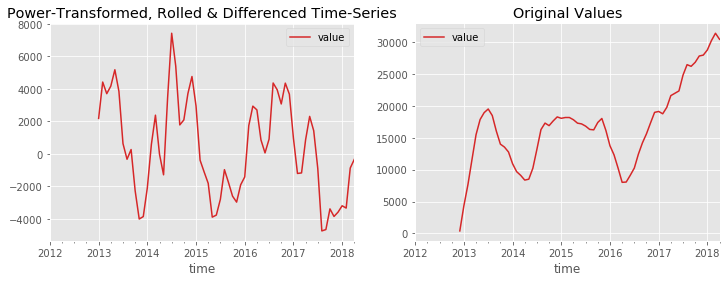

In [128]:
four_two_one_rolled_detrended_diff = four_one_four_rolled_detrended - four_one_four_rolled_detrended.shift()

ax1 = plt.subplot(121)
four_two_one_rolled_detrended_diff.plot(figsize=(8,4), color="tab:red", title="Power-Transformed, Rolled & Differenced Time-Series", ax=ax1);
ax2 = plt.subplot(122)
four_two_one_rolled_detrended.plot(figsize=(12,4), color="tab:red", title="Original Values", ax=ax2);

### Retesting with the Dicky-Fuller Test

Correcting for seasonality allowed for stationarity. 

In [129]:
dftest = adfuller(four_two_one_rolled_detrended_diff.dropna().values, autolag = 'AIC')

print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -3.6953668661418524
2. P-Value :  0.004178797302181956
3. Num Of Lags :  8
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 55
5. Critical Values :
	 1% :  -3.5552728880540942
	 5% :  -2.9157312396694217
	 10% :  -2.5956695041322315


In [130]:
four_two_one = four_two_one_rolled_detrended_diff

### SARIMAX Modeling: Parameter Selection

In [131]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 3)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [132]:
# Run a grid with pdq and seasonal pdq parameters 
#calculated above and get the best (lowest) AIC value
ans = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(four_two_one,
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            output = mod.fit()
            ans.append([comb, combs, output.aic])
            #print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, combs, output.aic))
        except:
            continue

### Fitting the Time Series Model - SARIMAX

In [133]:
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])

In [134]:
best_params = dict(ans_df.loc[ans_df['aic'].idxmin()])
best_params

{'pdq': (0, 2, 2), 'pdqs': (0, 2, 2, 12), 'aic': 431.2847625786172}

In [135]:
best_params['pdq']

(0, 2, 2)

In [136]:
# Plug the optimal parameter values into a new SARIMAX model
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(four_two_one, 
                                        order= best_params['pdq'], 
                                        seasonal_order=best_params['pdqs'], 
                                        enforce_stationarity=False, 
                                        enforce_invertibility=False)

# Fit the model and print results
output = ARIMA_MODEL.fit()

output.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              value   No. Observations:                   76
Model:             SARIMAX(0, 2, 2)x(0, 2, 2, 12)   Log Likelihood                -210.642
Date:                            Fri, 25 Dec 2020   AIC                            431.285
Time:                                    01:14:01   BIC                            436.962
Sample:                                01-31-2012   HQIC                           432.713
                                     - 04-30-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4397      2.410     -0.182      0.855      -5.163       4.284
ma.L2         -0.5653      1.239     -0.456      0.648      -2.994       1.863
ma.S.L12      -2.4002      0.788     -3.045      0.002      -3.945      -0.855
ma.S.L24       1.6105      2.168      0.743      0.458      -2.638       5.860
sigma2      1.927e+06   5.71e+06      0.337      0.736   -9.27e+06    1.31e+07
===================================================================================
Ljung-Box (Q):                       16.35   Jarque-Bera (JB):                 0.45
Prob(Q):                              0.80   Prob(JB):                         0.80
Heteroskedasticity (H):               1.26   Skew:                             0.08
Prob(H) (two-sided):                  0.75   Kurtosis:                         2.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Plot Diagnostics

- Standardized residual model seems to represent noise. 
- Histogram shows normality.
- QQ plot points follows the line with small lifts. 
- Correlogram points are inside the shaded region and do not show a missed seasonality component.

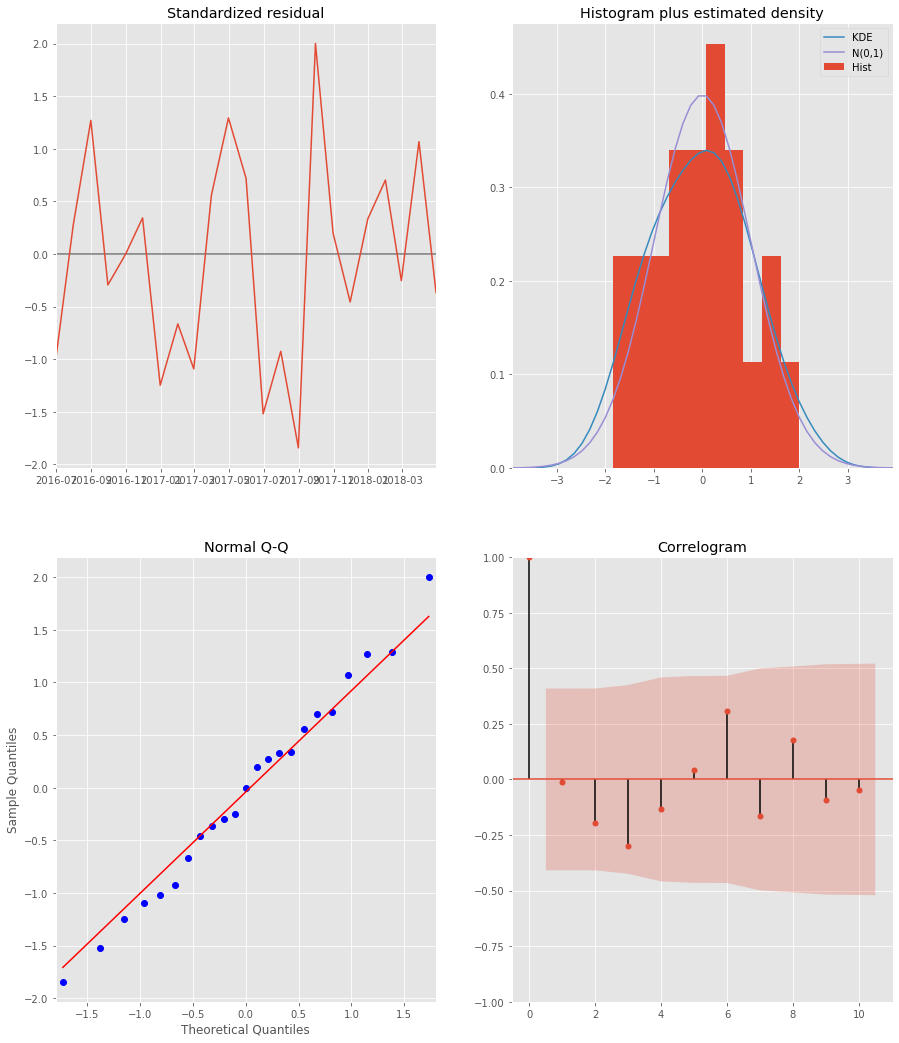

In [137]:
# Call plot_diagnostics() on the results calculated above 
output.plot_diagnostics(figsize=(15, 18))
plt.show()

### Model Validation - One Step Ahead Forecasting:

The data can be split 80% and 20% by indicing at 2017-01-31.

In [138]:
four_two_one[60:]

,value
time,
2017-01-31,966.666667
2017-02-28,-1208.333333
2017-03-31,-1175.000000
2017-04-30,866.666667
2017-05-31,2308.333333
2017-06-30,1425.000000
2017-07-31,-900.000000
2017-08-31,-4750.000000
2017-09-30,-4666.666667


In [139]:
pred = output.get_prediction(start=pd.to_datetime('2017-01-31'), dynamic=False)
pred_conf = pred.conf_int()

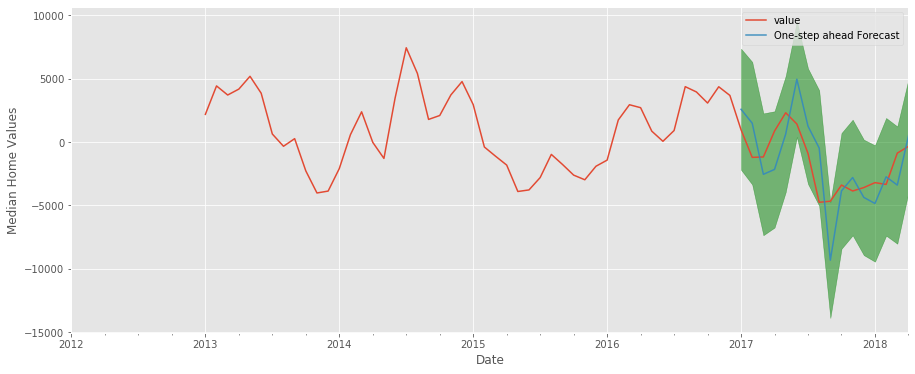

In [140]:

rcParams['figure.figsize'] = 15, 6

ax = four_two_one['2012':].plot(label='observed')

pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=0.9)

ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=0.5)

ax.set_xlabel('Date')
ax.set_ylabel('Median Home Values')
plt.legend()

plt.show()

### Accuracy Validation with RMSE (Root Mean Squared Error)

In [141]:
val_forecasted = pred.predicted_mean
val_truth = four_two_one.loc['2017-01-31':].value

mse = np.sqrt(((val_forecasted - val_truth) ** 2).mean())
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 2407.35


### Model Validation - Dynamic Forecasting

In [142]:
pred_dynamic = output.get_forecast(steps = 24)
pred_dynamic_conf = pred_dynamic.conf_int()


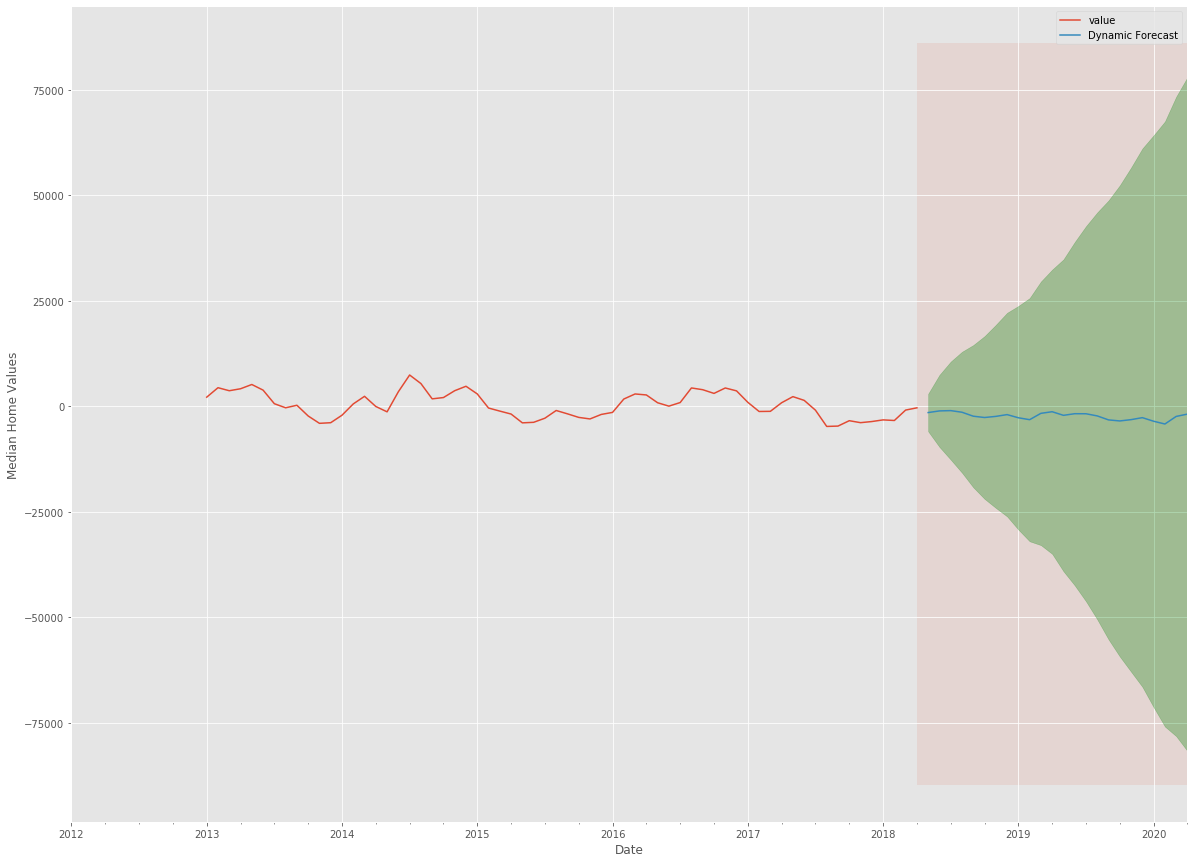

In [143]:
ax = four_two_one['2012':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_conf.index,
                pred_dynamic_conf.iloc[:, 0],
                pred_dynamic_conf.iloc[:, 1], color='g', alpha=.3)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2020-04-30'), val_forecasted.index[-1], alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Median Home Values')

plt.legend()
plt.show()


### Visualizing Confidence Interval

In [144]:
# Get forecast 24 steps ahead in future
prediction = output.get_forecast(steps=24)

# Get confidence intervals of forecasts
pred_conf = prediction.conf_int()

pred_conf['mean'] = prediction.predicted_mean

pred_conf.head()

,lower value,upper value,mean
2018-05-31,-5917.360611,2988.328956,-1464.515828
2018-06-30,-9611.429817,7462.855660,-1074.287078
2018-07-31,-12617.815542,10609.816855,-1003.999344
2018-08-31,-15713.890501,12938.268566,-1387.810968
2018-09-30,-19173.684568,14520.929364,-2326.377602


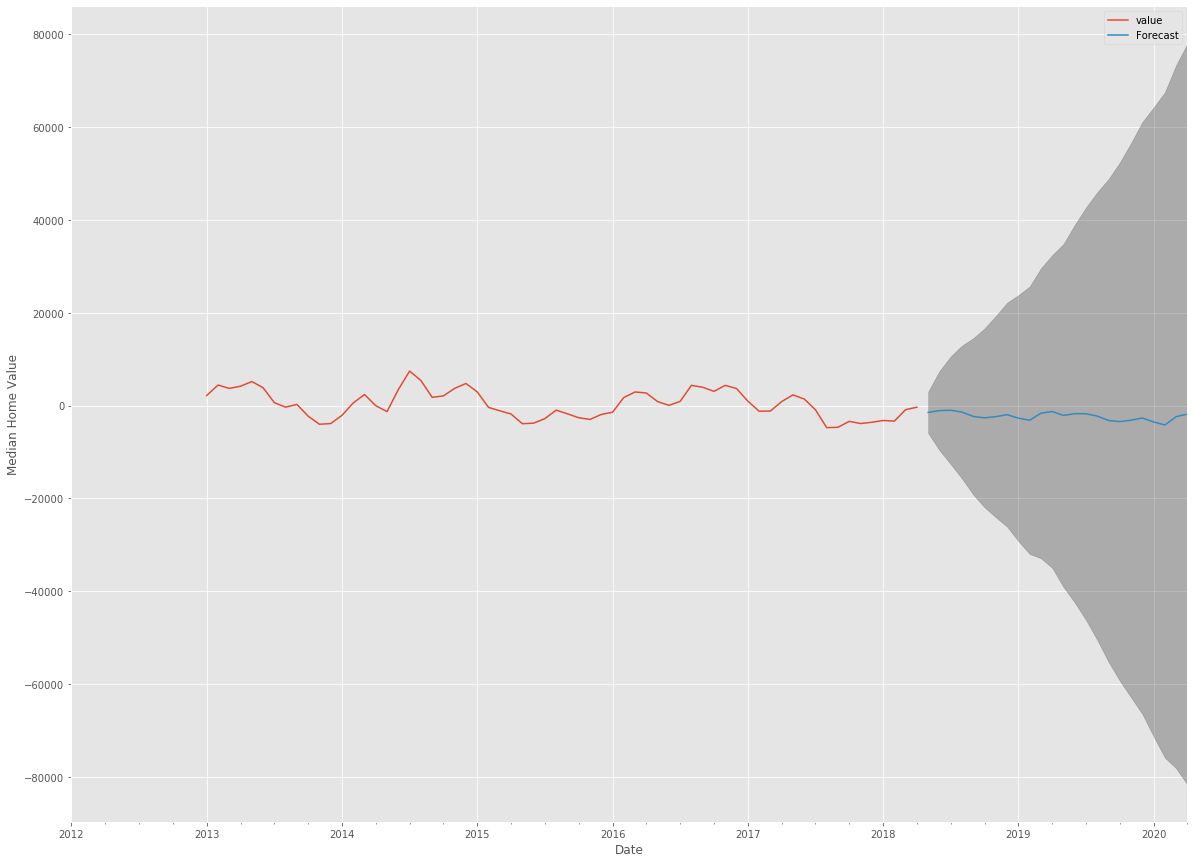

In [145]:
ax = four_two_one.plot(label='observed', figsize=(20, 15))
prediction.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='k', alpha=0.25)
ax.set_xlabel('Date')
ax.set_ylabel('Median Home Value')

plt.legend()
plt.show()

# Average Return on Investment (ROI) Percentage

The earliest predicted mean represents the value or possible cost of the property at the beginning of the real estate investing initiative. We calculate the percentage of return by subtracting cost from the average predicted values and dividing by the cost. Holding on to a percentage allows for comparison between other zipcodes.

In [146]:
cost = pred_conf.iloc[0]['mean']
roi = (pred_conf - cost)/ abs(cost) * 100

roi


,lower value,upper value,mean
2018-05-31,-304.048935,304.048935,0.000000
2018-06-30,-556.287193,609.578355,26.645581
2018-07-31,-761.569080,824.459009,31.444965
2018-08-31,-972.975123,983.450238,5.237558
2018-09-30,-1209.216617,1091.517407,-58.849605
2018-10-31,-1395.966157,1235.927040,-80.019558
2018-11-30,-1542.057393,1418.245239,-61.906077
2018-12-31,-1679.629021,1613.563360,-33.032831
2019-01-31,-1892.590067,1724.231411,-84.179328
2019-02-28,-2081.915419,1851.550792,-115.182314


# Results Dataframe

In [147]:
results.ROI_Percentage[3] = roi['mean'][-1]
results.head()


,Zipcode,ROI_Percentage
0,11385,211
1,11414,-24
2,11378,-25
3,11421,-24
4,11418,1


# Pickling the queens_grouped Dataframe + results Dataframe

In [150]:
queens_grouped.to_pickle("data/queens_grouped.pkl")

In [151]:
results.to_pickle("data/results.pkl")